# MNIST dataset

##### The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [1]:
# https://docs.python.org/2/library/gzip.html
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()


In [2]:
file_content[0:20]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00"

In [3]:
type(file_content)

bytes

In [4]:
int.from_bytes(file_content[0:4], byteorder="big")

2051

In [5]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [6]:
int.from_bytes(file_content[8:12], byteorder='big')

28

In [7]:
int.from_bytes(file_content[12:16], byteorder='big')

28

In [8]:
int.from_bytes(file_content[278:279], byteorder='big')

163

In [9]:
l = file_content[16:800]

In [10]:
type(l)

bytes

In [11]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

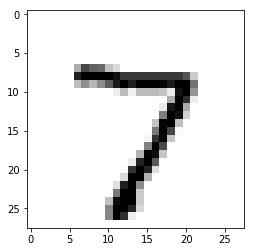

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

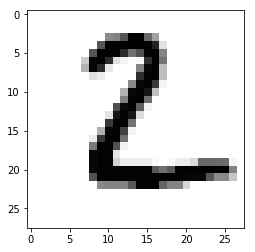

In [13]:
image1 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image1, cmap='gray')

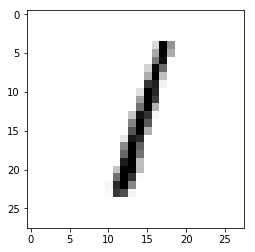

In [14]:
image2 = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)
plt.imshow(image2, cmap='gray')

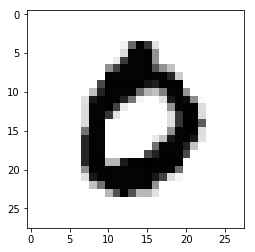

In [15]:
image1 = ~np.array(list(file_content[2368:3152])).reshape(28,28).astype(np.uint8)
plt.imshow(image1, cmap='gray')

In [16]:
import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [17]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [18]:
int.from_bytes(labels[9:10], byteorder="big")

2

In [19]:
int.from_bytes(labels[10:11], byteorder="big")

1

In [20]:
int.from_bytes(labels[11:12], byteorder="big")

0

In [25]:
storeArray = {}

In [32]:
path = "MNIST_data/"

In [45]:
import os
import shutil
from skimage.io import imsave

In [50]:
files = os.listdir(path)

print(files)

['t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 'train-images.idx3-ubyte', 'train-labels.idx1-ubyte']


In [60]:
for file in files:
    if file.endswith ("ubyte"):
        with open (path+file,'rb') as f:
            byte = f.read()
            magicNumber = int.from_bytes(byte[0:4], byteorder='big')
            
            imageSize = int.from_bytes(byte[4:8], byteorder='big')
            
            if(magicNumber == 2051):
                lable = 'images'
                rows = int.from_bytes(byte[8:12], byteorder='big')
                
                cols =int.from_bytes(byte[12:16], byteorder='big')
                
                # read 16 bytes after
                shape = np.frombuffer(byte,dtype = np.uint8, offset = 16)
                # reshape changed the strcture of the array
                shape =shape.reshape(imageSize,rows,cols)
            
            elif (magicNumber == 2049):# lable
                lable = 'lable'
                shape = np.frombuffer(byte,dtype = np.uint8,offset = 8)
                # reshape changed the strcture of the array
                shape =shape.reshape(imageSize)
            if (imageSize == 10000):
                imageTest = 'test'
            elif(imageSize == 60000):
                imageTest = 'train'
            
            storeArray[imageTest+lable] = shape

In [62]:
storeArray.keys()

dict_keys(['testimages', 'testlable', 'trainimages', 'trainlable'])

In [65]:
storeArray['testimages'][10,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [71]:
# folders creates called either test or train storing png files
folders = ['train','test']

for folder in folders:
    img = storeArray[folder + 'images']
    
    lables = storeArray[folder + 'lable']
    
    # getting the shape of the array
    shape = img.shape[0]

    for i in range(shape):
        print(folder,i)
        
        # getting the current image 
        image = img[i]
        # getting the current lable
        label = lables[i]
        
        if not os.path.exists(path+folder+'/'+str(label)+'/'):
            os.makedirs(path+folder+'/'+str(label)+'/')
        length =len(os.listdir(path+folder+'/'+str(label)+'/'))
        imsave(path+folder+'/'+str(label)+'/%05d.png'%(length+1),image)
    
    

train 0
train 1
train 2
train 3
train 4
train 5
train 6
train 7
train 8
train 9
train 10
train 11
train 12
train 13
train 14
train 15
train 16
train 17
train 18
train 19
train 20
train 21
train 22
train 23
train 24
train 25
train 26
train 27
train 28
train 29
train 30
train 31
train 32
train 33
train 34
train 35
train 36
train 37
train 38
train 39
train 40
train 41
train 42
train 43
train 44
train 45
train 46
train 47
train 48
train 49
train 50
train 51
train 52
train 53
train 54
train 55
train 56
train 57
train 58
train 59
train 60
train 61
train 62
train 63
train 64
train 65
train 66
train 67
train 68
train 69
train 70
train 71
train 72
train 73
train 74
train 75
train 76
train 77
train 78
train 79
train 80
train 81
train 82
train 83
train 84
train 85
train 86
train 87
train 88
train 89
train 90
train 91
train 92
train 93
train 94
train 95
train 96
train 97
train 98
train 99
train 100
train 101
train 102
train 103
train 104
train 105
train 106
train 107
train 108
train 109
train 110


train 846
train 847
train 848
train 849
train 850
train 851
train 852
train 853
train 854
train 855
train 856
train 857
train 858
train 859
train 860
train 861
train 862
train 863
train 864
train 865
train 866
train 867
train 868
train 869
train 870
train 871
train 872
train 873
train 874
train 875
train 876
train 877
train 878
train 879
train 880
train 881
train 882
train 883
train 884
train 885
train 886
train 887
train 888
train 889
train 890
train 891
train 892
train 893
train 894
train 895
train 896
train 897
train 898
train 899
train 900
train 901
train 902
train 903
train 904
train 905
train 906
train 907
train 908
train 909
train 910
train 911
train 912
train 913
train 914
train 915
train 916
train 917
train 918
train 919
train 920
train 921
train 922
train 923
train 924
train 925
train 926
train 927
train 928
train 929
train 930
train 931
train 932
train 933
train 934
train 935
train 936
train 937
train 938
train 939
train 940
train 941
train 942
train 943
train 944
train 945


train 1613
train 1614
train 1615
train 1616
train 1617
train 1618
train 1619
train 1620
train 1621
train 1622
train 1623
train 1624
train 1625
train 1626
train 1627
train 1628
train 1629
train 1630
train 1631
train 1632
train 1633
train 1634
train 1635
train 1636
train 1637
train 1638
train 1639
train 1640
train 1641
train 1642
train 1643
train 1644
train 1645
train 1646
train 1647
train 1648
train 1649
train 1650
train 1651
train 1652
train 1653
train 1654
train 1655
train 1656
train 1657
train 1658
train 1659
train 1660
train 1661
train 1662
train 1663
train 1664
train 1665
train 1666
train 1667
train 1668
train 1669
train 1670
train 1671
train 1672
train 1673
train 1674
train 1675
train 1676
train 1677
train 1678
train 1679
train 1680
train 1681
train 1682
train 1683
train 1684
train 1685
train 1686
train 1687
train 1688
train 1689
train 1690
train 1691
train 1692
train 1693
train 1694
train 1695
train 1696
train 1697
train 1698
train 1699
train 1700
train 1701
train 1702
train 1703

train 2361
train 2362
train 2363
train 2364
train 2365
train 2366
train 2367
train 2368
train 2369
train 2370
train 2371
train 2372
train 2373
train 2374
train 2375
train 2376
train 2377
train 2378
train 2379
train 2380
train 2381
train 2382
train 2383
train 2384
train 2385
train 2386
train 2387
train 2388
train 2389
train 2390
train 2391
train 2392
train 2393
train 2394
train 2395
train 2396
train 2397
train 2398
train 2399
train 2400
train 2401
train 2402
train 2403
train 2404
train 2405
train 2406
train 2407
train 2408
train 2409
train 2410
train 2411
train 2412
train 2413
train 2414
train 2415
train 2416
train 2417
train 2418
train 2419
train 2420
train 2421
train 2422
train 2423
train 2424
train 2425
train 2426
train 2427
train 2428
train 2429
train 2430
train 2431
train 2432
train 2433
train 2434
train 2435
train 2436
train 2437
train 2438
train 2439
train 2440
train 2441
train 2442
train 2443
train 2444
train 2445
train 2446
train 2447
train 2448
train 2449
train 2450
train 2451

train 3137
train 3138
train 3139
train 3140
train 3141
train 3142
train 3143
train 3144
train 3145
train 3146
train 3147
train 3148
train 3149
train 3150
train 3151
train 3152
train 3153
train 3154
train 3155
train 3156
train 3157
train 3158
train 3159
train 3160
train 3161
train 3162
train 3163
train 3164
train 3165
train 3166
train 3167
train 3168
train 3169
train 3170
train 3171
train 3172
train 3173
train 3174
train 3175
train 3176
train 3177
train 3178
train 3179
train 3180
train 3181
train 3182
train 3183
train 3184
train 3185
train 3186
train 3187
train 3188
train 3189
train 3190
train 3191
train 3192
train 3193
train 3194
train 3195
train 3196
train 3197
train 3198
train 3199
train 3200
train 3201
train 3202
train 3203
train 3204
train 3205
train 3206
train 3207
train 3208
train 3209
train 3210
train 3211
train 3212
train 3213
train 3214
train 3215
train 3216
train 3217
train 3218
train 3219
train 3220
train 3221
train 3222
train 3223
train 3224
train 3225
train 3226
train 3227

train 3901
train 3902
train 3903
train 3904
train 3905
train 3906
train 3907
train 3908
train 3909
train 3910
train 3911
train 3912
train 3913
train 3914
train 3915
train 3916
train 3917
train 3918
train 3919
train 3920
train 3921
train 3922
train 3923
train 3924
train 3925
train 3926
train 3927
train 3928
train 3929
train 3930
train 3931
train 3932
train 3933
train 3934
train 3935
train 3936
train 3937
train 3938
train 3939
train 3940
train 3941
train 3942
train 3943
train 3944
train 3945
train 3946
train 3947
train 3948
train 3949
train 3950
train 3951
train 3952
train 3953
train 3954
train 3955
train 3956
train 3957
train 3958
train 3959
train 3960
train 3961
train 3962
train 3963
train 3964
train 3965
train 3966
train 3967
train 3968
train 3969
train 3970
train 3971
train 3972
train 3973
train 3974
train 3975
train 3976
train 3977
train 3978
train 3979
train 3980
train 3981
train 3982
train 3983
train 3984
train 3985
train 3986
train 3987
train 3988
train 3989
train 3990
train 3991

train 4655
train 4656
train 4657
train 4658
train 4659
train 4660
train 4661
train 4662
train 4663
train 4664
train 4665
train 4666
train 4667
train 4668
train 4669
train 4670
train 4671
train 4672
train 4673
train 4674
train 4675
train 4676
train 4677
train 4678
train 4679
train 4680
train 4681
train 4682
train 4683
train 4684
train 4685
train 4686
train 4687
train 4688
train 4689
train 4690
train 4691
train 4692
train 4693
train 4694
train 4695
train 4696
train 4697
train 4698
train 4699
train 4700
train 4701
train 4702
train 4703
train 4704
train 4705
train 4706
train 4707
train 4708
train 4709
train 4710
train 4711
train 4712
train 4713
train 4714
train 4715
train 4716
train 4717
train 4718
train 4719
train 4720
train 4721
train 4722
train 4723
train 4724
train 4725
train 4726
train 4727
train 4728
train 4729
train 4730
train 4731
train 4732
train 4733
train 4734
train 4735
train 4736
train 4737
train 4738
train 4739
train 4740
train 4741
train 4742
train 4743
train 4744
train 4745

train 5420
train 5421
train 5422
train 5423
train 5424
train 5425
train 5426
train 5427
train 5428
train 5429
train 5430
train 5431
train 5432
train 5433
train 5434
train 5435
train 5436
train 5437
train 5438
train 5439
train 5440
train 5441
train 5442
train 5443
train 5444
train 5445
train 5446
train 5447
train 5448
train 5449
train 5450
train 5451
train 5452
train 5453
train 5454
train 5455
train 5456
train 5457
train 5458
train 5459
train 5460
train 5461
train 5462
train 5463
train 5464
train 5465
train 5466
train 5467
train 5468
train 5469
train 5470
train 5471
train 5472
train 5473
train 5474
train 5475
train 5476
train 5477
train 5478
train 5479
train 5480
train 5481
train 5482
train 5483
train 5484
train 5485
train 5486
train 5487
train 5488
train 5489
train 5490
train 5491
train 5492
train 5493
train 5494
train 5495
train 5496
train 5497
train 5498
train 5499
train 5500
train 5501
train 5502
train 5503
train 5504
train 5505
train 5506
train 5507
train 5508
train 5509
train 5510

train 6185
train 6186
train 6187
train 6188
train 6189
train 6190
train 6191
train 6192
train 6193
train 6194
train 6195
train 6196
train 6197
train 6198
train 6199
train 6200
train 6201
train 6202
train 6203
train 6204
train 6205
train 6206
train 6207
train 6208
train 6209
train 6210
train 6211
train 6212
train 6213
train 6214
train 6215
train 6216
train 6217
train 6218
train 6219
train 6220
train 6221
train 6222
train 6223
train 6224
train 6225
train 6226
train 6227
train 6228
train 6229
train 6230
train 6231
train 6232
train 6233
train 6234
train 6235
train 6236
train 6237
train 6238
train 6239
train 6240
train 6241
train 6242
train 6243
train 6244
train 6245
train 6246
train 6247
train 6248
train 6249
train 6250
train 6251
train 6252
train 6253
train 6254
train 6255
train 6256
train 6257
train 6258
train 6259
train 6260
train 6261
train 6262
train 6263
train 6264
train 6265
train 6266
train 6267
train 6268
train 6269
train 6270
train 6271
train 6272
train 6273
train 6274
train 6275

train 6933
train 6934
train 6935
train 6936
train 6937
train 6938
train 6939
train 6940
train 6941
train 6942
train 6943
train 6944
train 6945
train 6946
train 6947
train 6948
train 6949
train 6950
train 6951
train 6952
train 6953
train 6954
train 6955
train 6956
train 6957
train 6958
train 6959
train 6960
train 6961
train 6962
train 6963
train 6964
train 6965
train 6966
train 6967
train 6968
train 6969
train 6970
train 6971
train 6972
train 6973
train 6974
train 6975
train 6976
train 6977
train 6978
train 6979
train 6980
train 6981
train 6982
train 6983
train 6984
train 6985
train 6986
train 6987
train 6988
train 6989
train 6990
train 6991
train 6992
train 6993
train 6994
train 6995
train 6996
train 6997
train 6998
train 6999
train 7000
train 7001
train 7002
train 7003
train 7004
train 7005
train 7006
train 7007
train 7008
train 7009
train 7010
train 7011
train 7012
train 7013
train 7014
train 7015
train 7016
train 7017
train 7018
train 7019
train 7020
train 7021
train 7022
train 7023

train 7690
train 7691
train 7692
train 7693
train 7694
train 7695
train 7696
train 7697
train 7698
train 7699
train 7700
train 7701
train 7702
train 7703
train 7704
train 7705
train 7706
train 7707
train 7708
train 7709
train 7710
train 7711
train 7712
train 7713
train 7714
train 7715
train 7716
train 7717
train 7718
train 7719
train 7720
train 7721
train 7722
train 7723
train 7724
train 7725
train 7726
train 7727
train 7728
train 7729
train 7730
train 7731
train 7732
train 7733
train 7734
train 7735
train 7736
train 7737
train 7738
train 7739
train 7740
train 7741
train 7742
train 7743
train 7744
train 7745
train 7746
train 7747
train 7748
train 7749
train 7750
train 7751
train 7752
train 7753
train 7754
train 7755
train 7756
train 7757
train 7758
train 7759
train 7760
train 7761
train 7762
train 7763
train 7764
train 7765
train 7766
train 7767
train 7768
train 7769
train 7770
train 7771
train 7772
train 7773
train 7774
train 7775
train 7776
train 7777
train 7778
train 7779
train 7780

train 8453
train 8454
train 8455
train 8456
train 8457
train 8458
train 8459
train 8460
train 8461
train 8462
train 8463
train 8464
train 8465
train 8466
train 8467
train 8468
train 8469
train 8470
train 8471
train 8472
train 8473
train 8474
train 8475
train 8476
train 8477
train 8478
train 8479
train 8480
train 8481
train 8482
train 8483
train 8484
train 8485
train 8486
train 8487
train 8488
train 8489
train 8490
train 8491
train 8492
train 8493
train 8494
train 8495
train 8496
train 8497
train 8498
train 8499
train 8500
train 8501
train 8502
train 8503
train 8504
train 8505
train 8506
train 8507
train 8508
train 8509
train 8510
train 8511
train 8512
train 8513
train 8514
train 8515
train 8516
train 8517
train 8518
train 8519
train 8520
train 8521
train 8522
train 8523
train 8524
train 8525
train 8526
train 8527
train 8528
train 8529
train 8530
train 8531
train 8532
train 8533
train 8534
train 8535
train 8536
train 8537
train 8538
train 8539
train 8540
train 8541
train 8542
train 8543

train 9217
train 9218
train 9219
train 9220
train 9221
train 9222
train 9223
train 9224
train 9225
train 9226
train 9227
train 9228
train 9229
train 9230
train 9231
train 9232
train 9233
train 9234
train 9235
train 9236
train 9237
train 9238
train 9239
train 9240
train 9241
train 9242
train 9243
train 9244
train 9245
train 9246
train 9247
train 9248
train 9249
train 9250
train 9251
train 9252
train 9253
train 9254
train 9255
train 9256
train 9257
train 9258
train 9259
train 9260
train 9261
train 9262
train 9263
train 9264
train 9265
train 9266
train 9267
train 9268
train 9269
train 9270
train 9271
train 9272
train 9273
train 9274
train 9275
train 9276
train 9277
train 9278
train 9279
train 9280
train 9281
train 9282
train 9283
train 9284
train 9285
train 9286
train 9287
train 9288
train 9289
train 9290
train 9291
train 9292
train 9293
train 9294
train 9295
train 9296
train 9297
train 9298
train 9299
train 9300
train 9301
train 9302
train 9303
train 9304
train 9305
train 9306
train 9307

train 9970
train 9971
train 9972
train 9973
train 9974
train 9975
train 9976
train 9977
train 9978
train 9979
train 9980
train 9981
train 9982
train 9983
train 9984
train 9985
train 9986
train 9987
train 9988
train 9989
train 9990
train 9991
train 9992
train 9993
train 9994
train 9995
train 9996
train 9997
train 9998
train 9999
train 10000
train 10001
train 10002
train 10003
train 10004
train 10005
train 10006
train 10007
train 10008
train 10009
train 10010
train 10011
train 10012
train 10013
train 10014
train 10015
train 10016
train 10017
train 10018
train 10019
train 10020
train 10021
train 10022
train 10023
train 10024
train 10025
train 10026
train 10027
train 10028
train 10029
train 10030
train 10031
train 10032
train 10033
train 10034
train 10035
train 10036
train 10037
train 10038
train 10039
train 10040
train 10041
train 10042
train 10043
train 10044
train 10045
train 10046
train 10047
train 10048
train 10049
train 10050
train 10051
train 10052
train 10053
train 10054
train 1005

train 10656
train 10657
train 10658
train 10659
train 10660
train 10661
train 10662
train 10663
train 10664
train 10665
train 10666
train 10667
train 10668
train 10669
train 10670
train 10671
train 10672
train 10673
train 10674
train 10675
train 10676
train 10677
train 10678
train 10679
train 10680
train 10681
train 10682
train 10683
train 10684
train 10685
train 10686
train 10687
train 10688
train 10689
train 10690
train 10691
train 10692
train 10693
train 10694
train 10695
train 10696
train 10697
train 10698
train 10699
train 10700
train 10701
train 10702
train 10703
train 10704
train 10705
train 10706
train 10707
train 10708
train 10709
train 10710
train 10711
train 10712
train 10713
train 10714
train 10715
train 10716
train 10717
train 10718
train 10719
train 10720
train 10721
train 10722
train 10723
train 10724
train 10725
train 10726
train 10727
train 10728
train 10729
train 10730
train 10731
train 10732
train 10733
train 10734
train 10735
train 10736
train 10737
train 10738
trai

train 11354
train 11355
train 11356
train 11357
train 11358
train 11359
train 11360
train 11361
train 11362
train 11363
train 11364
train 11365
train 11366
train 11367
train 11368
train 11369
train 11370
train 11371
train 11372
train 11373
train 11374
train 11375
train 11376
train 11377
train 11378
train 11379
train 11380
train 11381
train 11382
train 11383
train 11384
train 11385
train 11386
train 11387
train 11388
train 11389
train 11390
train 11391
train 11392
train 11393
train 11394
train 11395
train 11396
train 11397
train 11398
train 11399
train 11400
train 11401
train 11402
train 11403
train 11404
train 11405
train 11406
train 11407
train 11408
train 11409
train 11410
train 11411
train 11412
train 11413
train 11414
train 11415
train 11416
train 11417
train 11418
train 11419
train 11420
train 11421
train 11422
train 11423
train 11424
train 11425
train 11426
train 11427
train 11428
train 11429
train 11430
train 11431
train 11432
train 11433
train 11434
train 11435
train 11436
trai

train 12061
train 12062
train 12063
train 12064
train 12065
train 12066
train 12067
train 12068
train 12069
train 12070
train 12071
train 12072
train 12073
train 12074
train 12075
train 12076
train 12077
train 12078
train 12079
train 12080
train 12081
train 12082
train 12083
train 12084
train 12085
train 12086
train 12087
train 12088
train 12089
train 12090
train 12091
train 12092
train 12093
train 12094
train 12095
train 12096
train 12097
train 12098
train 12099
train 12100
train 12101
train 12102
train 12103
train 12104
train 12105
train 12106
train 12107
train 12108
train 12109
train 12110
train 12111
train 12112
train 12113
train 12114
train 12115
train 12116
train 12117
train 12118
train 12119
train 12120
train 12121
train 12122
train 12123
train 12124
train 12125
train 12126
train 12127
train 12128
train 12129
train 12130
train 12131
train 12132
train 12133
train 12134
train 12135
train 12136
train 12137
train 12138
train 12139
train 12140
train 12141
train 12142
train 12143
trai

train 12746
train 12747
train 12748
train 12749
train 12750
train 12751
train 12752
train 12753
train 12754
train 12755
train 12756
train 12757
train 12758
train 12759
train 12760
train 12761
train 12762
train 12763
train 12764
train 12765
train 12766
train 12767
train 12768
train 12769
train 12770
train 12771
train 12772
train 12773
train 12774
train 12775
train 12776
train 12777
train 12778
train 12779
train 12780
train 12781
train 12782
train 12783
train 12784
train 12785
train 12786
train 12787
train 12788
train 12789
train 12790
train 12791
train 12792
train 12793
train 12794
train 12795
train 12796
train 12797
train 12798
train 12799
train 12800
train 12801
train 12802
train 12803
train 12804
train 12805
train 12806
train 12807
train 12808
train 12809
train 12810
train 12811
train 12812
train 12813
train 12814
train 12815
train 12816
train 12817
train 12818
train 12819
train 12820
train 12821
train 12822
train 12823
train 12824
train 12825
train 12826
train 12827
train 12828
trai

train 13440
train 13441
train 13442
train 13443
train 13444
train 13445
train 13446
train 13447
train 13448
train 13449
train 13450
train 13451
train 13452
train 13453
train 13454
train 13455
train 13456
train 13457
train 13458
train 13459
train 13460
train 13461
train 13462
train 13463
train 13464
train 13465
train 13466
train 13467
train 13468
train 13469
train 13470
train 13471
train 13472
train 13473
train 13474
train 13475
train 13476
train 13477
train 13478
train 13479
train 13480
train 13481
train 13482
train 13483
train 13484
train 13485
train 13486
train 13487
train 13488
train 13489
train 13490
train 13491
train 13492
train 13493
train 13494
train 13495
train 13496
train 13497
train 13498
train 13499
train 13500
train 13501
train 13502
train 13503
train 13504
train 13505
train 13506
train 13507
train 13508
train 13509
train 13510
train 13511
train 13512
train 13513
train 13514
train 13515
train 13516
train 13517
train 13518
train 13519
train 13520
train 13521
train 13522
trai

train 14133
train 14134
train 14135
train 14136
train 14137
train 14138
train 14139
train 14140
train 14141
train 14142
train 14143
train 14144
train 14145
train 14146
train 14147
train 14148
train 14149
train 14150
train 14151
train 14152
train 14153
train 14154
train 14155
train 14156
train 14157
train 14158
train 14159
train 14160
train 14161
train 14162
train 14163
train 14164
train 14165
train 14166
train 14167
train 14168
train 14169
train 14170
train 14171
train 14172
train 14173
train 14174
train 14175
train 14176
train 14177
train 14178
train 14179
train 14180
train 14181
train 14182
train 14183
train 14184
train 14185
train 14186
train 14187
train 14188
train 14189
train 14190
train 14191
train 14192
train 14193
train 14194
train 14195
train 14196
train 14197
train 14198
train 14199
train 14200
train 14201
train 14202
train 14203
train 14204
train 14205
train 14206
train 14207
train 14208
train 14209
train 14210
train 14211
train 14212
train 14213
train 14214
train 14215
trai

train 14831
train 14832
train 14833
train 14834
train 14835
train 14836
train 14837
train 14838
train 14839
train 14840
train 14841
train 14842
train 14843
train 14844
train 14845
train 14846
train 14847
train 14848
train 14849
train 14850
train 14851
train 14852
train 14853
train 14854
train 14855
train 14856
train 14857
train 14858
train 14859
train 14860
train 14861
train 14862
train 14863
train 14864
train 14865
train 14866
train 14867
train 14868
train 14869
train 14870
train 14871
train 14872
train 14873
train 14874
train 14875
train 14876
train 14877
train 14878
train 14879
train 14880
train 14881
train 14882
train 14883
train 14884
train 14885
train 14886
train 14887
train 14888
train 14889
train 14890
train 14891
train 14892
train 14893
train 14894
train 14895
train 14896
train 14897
train 14898
train 14899
train 14900
train 14901
train 14902
train 14903
train 14904
train 14905
train 14906
train 14907
train 14908
train 14909
train 14910
train 14911
train 14912
train 14913
trai

train 15517
train 15518
train 15519
train 15520
train 15521
train 15522
train 15523
train 15524
train 15525
train 15526
train 15527
train 15528
train 15529
train 15530
train 15531
train 15532
train 15533
train 15534
train 15535
train 15536
train 15537
train 15538
train 15539
train 15540
train 15541
train 15542
train 15543
train 15544
train 15545
train 15546
train 15547
train 15548
train 15549
train 15550
train 15551
train 15552
train 15553
train 15554
train 15555
train 15556
train 15557
train 15558
train 15559
train 15560
train 15561
train 15562
train 15563
train 15564
train 15565
train 15566
train 15567
train 15568
train 15569
train 15570
train 15571
train 15572
train 15573
train 15574
train 15575
train 15576
train 15577
train 15578
train 15579
train 15580
train 15581
train 15582
train 15583
train 15584
train 15585
train 15586
train 15587
train 15588
train 15589
train 15590
train 15591
train 15592
train 15593
train 15594
train 15595
train 15596
train 15597
train 15598
train 15599
trai

train 16201
train 16202
train 16203
train 16204
train 16205
train 16206
train 16207
train 16208
train 16209
train 16210
train 16211
train 16212
train 16213
train 16214
train 16215
train 16216
train 16217
train 16218
train 16219
train 16220
train 16221
train 16222
train 16223
train 16224
train 16225
train 16226
train 16227
train 16228
train 16229
train 16230
train 16231
train 16232
train 16233
train 16234
train 16235
train 16236
train 16237
train 16238
train 16239
train 16240
train 16241
train 16242
train 16243
train 16244
train 16245
train 16246
train 16247
train 16248
train 16249
train 16250
train 16251
train 16252
train 16253
train 16254
train 16255
train 16256
train 16257
train 16258
train 16259
train 16260
train 16261
train 16262
train 16263
train 16264
train 16265
train 16266
train 16267
train 16268
train 16269
train 16270
train 16271
train 16272
train 16273
train 16274
train 16275
train 16276
train 16277
train 16278
train 16279
train 16280
train 16281
train 16282
train 16283
trai

train 16905
train 16906
train 16907
train 16908
train 16909
train 16910
train 16911
train 16912
train 16913
train 16914
train 16915
train 16916
train 16917
train 16918
train 16919
train 16920
train 16921
train 16922
train 16923
train 16924
train 16925
train 16926
train 16927
train 16928
train 16929
train 16930
train 16931
train 16932
train 16933
train 16934
train 16935
train 16936
train 16937
train 16938
train 16939
train 16940
train 16941
train 16942
train 16943
train 16944
train 16945
train 16946
train 16947
train 16948
train 16949
train 16950
train 16951
train 16952
train 16953
train 16954
train 16955
train 16956
train 16957
train 16958
train 16959
train 16960
train 16961
train 16962
train 16963
train 16964
train 16965
train 16966
train 16967
train 16968
train 16969
train 16970
train 16971
train 16972
train 16973
train 16974
train 16975
train 16976
train 16977
train 16978
train 16979
train 16980
train 16981
train 16982
train 16983
train 16984
train 16985
train 16986
train 16987
trai

train 17591
train 17592
train 17593
train 17594
train 17595
train 17596
train 17597
train 17598
train 17599
train 17600
train 17601
train 17602
train 17603
train 17604
train 17605
train 17606
train 17607
train 17608
train 17609
train 17610
train 17611
train 17612
train 17613
train 17614
train 17615
train 17616
train 17617
train 17618
train 17619
train 17620
train 17621
train 17622
train 17623
train 17624
train 17625
train 17626
train 17627
train 17628
train 17629
train 17630
train 17631
train 17632
train 17633
train 17634
train 17635
train 17636
train 17637
train 17638
train 17639
train 17640
train 17641
train 17642
train 17643
train 17644
train 17645
train 17646
train 17647
train 17648
train 17649
train 17650
train 17651
train 17652
train 17653
train 17654
train 17655
train 17656
train 17657
train 17658
train 17659
train 17660
train 17661
train 17662
train 17663
train 17664
train 17665
train 17666
train 17667
train 17668
train 17669
train 17670
train 17671
train 17672
train 17673
trai

train 18290
train 18291
train 18292
train 18293
train 18294
train 18295
train 18296
train 18297
train 18298
train 18299
train 18300
train 18301
train 18302
train 18303
train 18304
train 18305
train 18306
train 18307
train 18308
train 18309
train 18310
train 18311
train 18312
train 18313
train 18314
train 18315
train 18316
train 18317
train 18318
train 18319
train 18320
train 18321
train 18322
train 18323
train 18324
train 18325
train 18326
train 18327
train 18328
train 18329
train 18330
train 18331
train 18332
train 18333
train 18334
train 18335
train 18336
train 18337
train 18338
train 18339
train 18340
train 18341
train 18342
train 18343
train 18344
train 18345
train 18346
train 18347
train 18348
train 18349
train 18350
train 18351
train 18352
train 18353
train 18354
train 18355
train 18356
train 18357
train 18358
train 18359
train 18360
train 18361
train 18362
train 18363
train 18364
train 18365
train 18366
train 18367
train 18368
train 18369
train 18370
train 18371
train 18372
trai

train 18980
train 18981
train 18982
train 18983
train 18984
train 18985
train 18986
train 18987
train 18988
train 18989
train 18990
train 18991
train 18992
train 18993
train 18994
train 18995
train 18996
train 18997
train 18998
train 18999
train 19000
train 19001
train 19002
train 19003
train 19004
train 19005
train 19006
train 19007
train 19008
train 19009
train 19010
train 19011
train 19012
train 19013
train 19014
train 19015
train 19016
train 19017
train 19018
train 19019
train 19020
train 19021
train 19022
train 19023
train 19024
train 19025
train 19026
train 19027
train 19028
train 19029
train 19030
train 19031
train 19032
train 19033
train 19034
train 19035
train 19036
train 19037
train 19038
train 19039
train 19040
train 19041
train 19042
train 19043
train 19044
train 19045
train 19046
train 19047
train 19048
train 19049
train 19050
train 19051
train 19052
train 19053
train 19054
train 19055
train 19056
train 19057
train 19058
train 19059
train 19060
train 19061
train 19062
trai

train 19683
train 19684
train 19685
train 19686
train 19687
train 19688
train 19689
train 19690
train 19691
train 19692
train 19693
train 19694
train 19695
train 19696
train 19697
train 19698
train 19699
train 19700
train 19701
train 19702
train 19703
train 19704
train 19705
train 19706
train 19707
train 19708
train 19709
train 19710
train 19711
train 19712
train 19713
train 19714
train 19715
train 19716
train 19717
train 19718
train 19719
train 19720
train 19721
train 19722
train 19723
train 19724
train 19725
train 19726
train 19727
train 19728
train 19729
train 19730
train 19731
train 19732
train 19733
train 19734
train 19735
train 19736
train 19737
train 19738
train 19739
train 19740
train 19741
train 19742
train 19743
train 19744
train 19745
train 19746
train 19747
train 19748
train 19749
train 19750
train 19751
train 19752
train 19753
train 19754
train 19755
train 19756
train 19757
train 19758
train 19759
train 19760
train 19761
train 19762
train 19763
train 19764
train 19765
trai

train 20377
train 20378
train 20379
train 20380
train 20381
train 20382
train 20383
train 20384
train 20385
train 20386
train 20387
train 20388
train 20389
train 20390
train 20391
train 20392
train 20393
train 20394
train 20395
train 20396
train 20397
train 20398
train 20399
train 20400
train 20401
train 20402
train 20403
train 20404
train 20405
train 20406
train 20407
train 20408
train 20409
train 20410
train 20411
train 20412
train 20413
train 20414
train 20415
train 20416
train 20417
train 20418
train 20419
train 20420
train 20421
train 20422
train 20423
train 20424
train 20425
train 20426
train 20427
train 20428
train 20429
train 20430
train 20431
train 20432
train 20433
train 20434
train 20435
train 20436
train 20437
train 20438
train 20439
train 20440
train 20441
train 20442
train 20443
train 20444
train 20445
train 20446
train 20447
train 20448
train 20449
train 20450
train 20451
train 20452
train 20453
train 20454
train 20455
train 20456
train 20457
train 20458
train 20459
trai

train 21069
train 21070
train 21071
train 21072
train 21073
train 21074
train 21075
train 21076
train 21077
train 21078
train 21079
train 21080
train 21081
train 21082
train 21083
train 21084
train 21085
train 21086
train 21087
train 21088
train 21089
train 21090
train 21091
train 21092
train 21093
train 21094
train 21095
train 21096
train 21097
train 21098
train 21099
train 21100
train 21101
train 21102
train 21103
train 21104
train 21105
train 21106
train 21107
train 21108
train 21109
train 21110
train 21111
train 21112
train 21113
train 21114
train 21115
train 21116
train 21117
train 21118
train 21119
train 21120
train 21121
train 21122
train 21123
train 21124
train 21125
train 21126
train 21127
train 21128
train 21129
train 21130
train 21131
train 21132
train 21133
train 21134
train 21135
train 21136
train 21137
train 21138
train 21139
train 21140
train 21141
train 21142
train 21143
train 21144
train 21145
train 21146
train 21147
train 21148
train 21149
train 21150
train 21151
trai

train 21758
train 21759
train 21760
train 21761
train 21762
train 21763
train 21764
train 21765
train 21766
train 21767
train 21768
train 21769
train 21770
train 21771
train 21772
train 21773
train 21774
train 21775
train 21776
train 21777
train 21778
train 21779
train 21780
train 21781
train 21782
train 21783
train 21784
train 21785
train 21786
train 21787
train 21788
train 21789
train 21790
train 21791
train 21792
train 21793
train 21794
train 21795
train 21796
train 21797
train 21798
train 21799
train 21800
train 21801
train 21802
train 21803
train 21804
train 21805
train 21806
train 21807
train 21808
train 21809
train 21810
train 21811
train 21812
train 21813
train 21814
train 21815
train 21816
train 21817
train 21818
train 21819
train 21820
train 21821
train 21822
train 21823
train 21824
train 21825
train 21826
train 21827
train 21828
train 21829
train 21830
train 21831
train 21832
train 21833
train 21834
train 21835
train 21836
train 21837
train 21838
train 21839
train 21840
trai

train 22452
train 22453
train 22454
train 22455
train 22456
train 22457
train 22458
train 22459
train 22460
train 22461
train 22462
train 22463
train 22464
train 22465
train 22466
train 22467
train 22468
train 22469
train 22470
train 22471
train 22472
train 22473
train 22474
train 22475
train 22476
train 22477
train 22478
train 22479
train 22480
train 22481
train 22482
train 22483
train 22484
train 22485
train 22486
train 22487
train 22488
train 22489
train 22490
train 22491
train 22492
train 22493
train 22494
train 22495
train 22496
train 22497
train 22498
train 22499
train 22500
train 22501
train 22502
train 22503
train 22504
train 22505
train 22506
train 22507
train 22508
train 22509
train 22510
train 22511
train 22512
train 22513
train 22514
train 22515
train 22516
train 22517
train 22518
train 22519
train 22520
train 22521
train 22522
train 22523
train 22524
train 22525
train 22526
train 22527
train 22528
train 22529
train 22530
train 22531
train 22532
train 22533
train 22534
trai

train 23148
train 23149
train 23150
train 23151
train 23152
train 23153
train 23154
train 23155
train 23156
train 23157
train 23158
train 23159
train 23160
train 23161
train 23162
train 23163
train 23164
train 23165
train 23166
train 23167
train 23168
train 23169
train 23170
train 23171
train 23172
train 23173
train 23174
train 23175
train 23176
train 23177
train 23178
train 23179
train 23180
train 23181
train 23182
train 23183
train 23184
train 23185
train 23186
train 23187
train 23188
train 23189
train 23190
train 23191
train 23192
train 23193
train 23194
train 23195
train 23196
train 23197
train 23198
train 23199
train 23200
train 23201
train 23202
train 23203
train 23204
train 23205
train 23206
train 23207
train 23208
train 23209
train 23210
train 23211
train 23212
train 23213
train 23214
train 23215
train 23216
train 23217
train 23218
train 23219
train 23220
train 23221
train 23222
train 23223
train 23224
train 23225
train 23226
train 23227
train 23228
train 23229
train 23230
trai

train 23836
train 23837
train 23838
train 23839
train 23840
train 23841
train 23842
train 23843
train 23844
train 23845
train 23846
train 23847
train 23848
train 23849
train 23850
train 23851
train 23852
train 23853
train 23854
train 23855
train 23856
train 23857
train 23858
train 23859
train 23860
train 23861
train 23862
train 23863
train 23864
train 23865
train 23866
train 23867
train 23868
train 23869
train 23870
train 23871
train 23872
train 23873
train 23874
train 23875
train 23876
train 23877
train 23878
train 23879
train 23880
train 23881
train 23882
train 23883
train 23884
train 23885
train 23886
train 23887
train 23888
train 23889
train 23890
train 23891
train 23892
train 23893
train 23894
train 23895
train 23896
train 23897
train 23898
train 23899
train 23900
train 23901
train 23902
train 23903
train 23904
train 23905
train 23906
train 23907
train 23908
train 23909
train 23910
train 23911
train 23912
train 23913
train 23914
train 23915
train 23916
train 23917
train 23918
trai

train 24528
train 24529
train 24530
train 24531
train 24532
train 24533
train 24534
train 24535
train 24536
train 24537
train 24538
train 24539
train 24540
train 24541
train 24542
train 24543
train 24544
train 24545
train 24546
train 24547
train 24548
train 24549
train 24550
train 24551
train 24552
train 24553
train 24554
train 24555
train 24556
train 24557
train 24558
train 24559
train 24560
train 24561
train 24562
train 24563
train 24564
train 24565
train 24566
train 24567
train 24568
train 24569
train 24570
train 24571
train 24572
train 24573
train 24574
train 24575
train 24576
train 24577
train 24578
train 24579
train 24580
train 24581
train 24582
train 24583
train 24584
train 24585
train 24586
train 24587
train 24588
train 24589
train 24590
train 24591
train 24592
train 24593
train 24594
train 24595
train 24596
train 24597
train 24598
train 24599
train 24600
train 24601
train 24602
train 24603
train 24604
train 24605
train 24606
train 24607
train 24608
train 24609
train 24610
trai

train 25223
train 25224
train 25225
train 25226
train 25227
train 25228
train 25229
train 25230
train 25231
train 25232
train 25233
train 25234
train 25235
train 25236
train 25237
train 25238
train 25239
train 25240
train 25241
train 25242
train 25243
train 25244
train 25245
train 25246
train 25247
train 25248
train 25249
train 25250
train 25251
train 25252
train 25253
train 25254
train 25255
train 25256
train 25257
train 25258
train 25259
train 25260
train 25261
train 25262
train 25263
train 25264
train 25265
train 25266
train 25267
train 25268
train 25269
train 25270
train 25271
train 25272
train 25273
train 25274
train 25275
train 25276
train 25277
train 25278
train 25279
train 25280
train 25281
train 25282
train 25283
train 25284
train 25285
train 25286
train 25287
train 25288
train 25289
train 25290
train 25291
train 25292
train 25293
train 25294
train 25295
train 25296
train 25297
train 25298
train 25299
train 25300
train 25301
train 25302
train 25303
train 25304
train 25305
trai

train 25917
train 25918
train 25919
train 25920
train 25921
train 25922
train 25923
train 25924
train 25925
train 25926
train 25927
train 25928
train 25929
train 25930
train 25931
train 25932
train 25933
train 25934
train 25935
train 25936
train 25937
train 25938
train 25939
train 25940
train 25941
train 25942
train 25943
train 25944
train 25945
train 25946
train 25947
train 25948
train 25949
train 25950
train 25951
train 25952
train 25953
train 25954
train 25955
train 25956
train 25957
train 25958
train 25959
train 25960
train 25961
train 25962
train 25963
train 25964
train 25965
train 25966
train 25967
train 25968
train 25969
train 25970
train 25971
train 25972
train 25973
train 25974
train 25975
train 25976
train 25977
train 25978
train 25979
train 25980
train 25981
train 25982
train 25983
train 25984
train 25985
train 25986
train 25987
train 25988
train 25989
train 25990
train 25991
train 25992
train 25993
train 25994
train 25995
train 25996
train 25997
train 25998
train 25999
trai

train 26602
train 26603
train 26604
train 26605
train 26606
train 26607
train 26608
train 26609
train 26610
train 26611
train 26612
train 26613
train 26614
train 26615
train 26616
train 26617
train 26618
train 26619
train 26620
train 26621
train 26622
train 26623
train 26624
train 26625
train 26626
train 26627
train 26628
train 26629
train 26630
train 26631
train 26632
train 26633
train 26634
train 26635
train 26636
train 26637
train 26638
train 26639
train 26640
train 26641
train 26642
train 26643
train 26644
train 26645
train 26646
train 26647
train 26648
train 26649
train 26650
train 26651
train 26652
train 26653
train 26654
train 26655
train 26656
train 26657
train 26658
train 26659
train 26660
train 26661
train 26662
train 26663
train 26664
train 26665
train 26666
train 26667
train 26668
train 26669
train 26670
train 26671
train 26672
train 26673
train 26674
train 26675
train 26676
train 26677
train 26678
train 26679
train 26680
train 26681
train 26682
train 26683
train 26684
trai

train 27295
train 27296
train 27297
train 27298
train 27299
train 27300
train 27301
train 27302
train 27303
train 27304
train 27305
train 27306
train 27307
train 27308
train 27309
train 27310
train 27311
train 27312
train 27313
train 27314
train 27315
train 27316
train 27317
train 27318
train 27319
train 27320
train 27321
train 27322
train 27323
train 27324
train 27325
train 27326
train 27327
train 27328
train 27329
train 27330
train 27331
train 27332
train 27333
train 27334
train 27335
train 27336
train 27337
train 27338
train 27339
train 27340
train 27341
train 27342
train 27343
train 27344
train 27345
train 27346
train 27347
train 27348
train 27349
train 27350
train 27351
train 27352
train 27353
train 27354
train 27355
train 27356
train 27357
train 27358
train 27359
train 27360
train 27361
train 27362
train 27363
train 27364
train 27365
train 27366
train 27367
train 27368
train 27369
train 27370
train 27371
train 27372
train 27373
train 27374
train 27375
train 27376
train 27377
trai

train 27979
train 27980
train 27981
train 27982
train 27983
train 27984
train 27985
train 27986
train 27987
train 27988
train 27989
train 27990
train 27991
train 27992
train 27993
train 27994
train 27995
train 27996
train 27997
train 27998
train 27999
train 28000
train 28001
train 28002
train 28003
train 28004
train 28005
train 28006
train 28007
train 28008
train 28009
train 28010
train 28011
train 28012
train 28013
train 28014
train 28015
train 28016
train 28017
train 28018
train 28019
train 28020
train 28021
train 28022
train 28023
train 28024
train 28025
train 28026
train 28027
train 28028
train 28029
train 28030
train 28031
train 28032
train 28033
train 28034
train 28035
train 28036
train 28037
train 28038
train 28039
train 28040
train 28041
train 28042
train 28043
train 28044
train 28045
train 28046
train 28047
train 28048
train 28049
train 28050
train 28051
train 28052
train 28053
train 28054
train 28055
train 28056
train 28057
train 28058
train 28059
train 28060
train 28061
trai

train 28673
train 28674
train 28675
train 28676
train 28677
train 28678
train 28679
train 28680
train 28681
train 28682
train 28683
train 28684
train 28685
train 28686
train 28687
train 28688
train 28689
train 28690
train 28691
train 28692
train 28693
train 28694
train 28695
train 28696
train 28697
train 28698
train 28699
train 28700
train 28701
train 28702
train 28703
train 28704
train 28705
train 28706
train 28707
train 28708
train 28709
train 28710
train 28711
train 28712
train 28713
train 28714
train 28715
train 28716
train 28717
train 28718
train 28719
train 28720
train 28721
train 28722
train 28723
train 28724
train 28725
train 28726
train 28727
train 28728
train 28729
train 28730
train 28731
train 28732
train 28733
train 28734
train 28735
train 28736
train 28737
train 28738
train 28739
train 28740
train 28741
train 28742
train 28743
train 28744
train 28745
train 28746
train 28747
train 28748
train 28749
train 28750
train 28751
train 28752
train 28753
train 28754
train 28755
trai

train 29359
train 29360
train 29361
train 29362
train 29363
train 29364
train 29365
train 29366
train 29367
train 29368
train 29369
train 29370
train 29371
train 29372
train 29373
train 29374
train 29375
train 29376
train 29377
train 29378
train 29379
train 29380
train 29381
train 29382
train 29383
train 29384
train 29385
train 29386
train 29387
train 29388
train 29389
train 29390
train 29391
train 29392
train 29393
train 29394
train 29395
train 29396
train 29397
train 29398
train 29399
train 29400
train 29401
train 29402
train 29403
train 29404
train 29405
train 29406
train 29407
train 29408
train 29409
train 29410
train 29411
train 29412
train 29413
train 29414
train 29415
train 29416
train 29417
train 29418
train 29419
train 29420
train 29421
train 29422
train 29423
train 29424
train 29425
train 29426
train 29427
train 29428
train 29429
train 29430
train 29431
train 29432
train 29433
train 29434
train 29435
train 29436
train 29437
train 29438
train 29439
train 29440
train 29441
trai

train 30046
train 30047
train 30048
train 30049
train 30050
train 30051
train 30052
train 30053
train 30054
train 30055
train 30056
train 30057
train 30058
train 30059
train 30060
train 30061
train 30062
train 30063
train 30064
train 30065
train 30066
train 30067
train 30068
train 30069
train 30070
train 30071
train 30072
train 30073
train 30074
train 30075
train 30076
train 30077
train 30078
train 30079
train 30080
train 30081
train 30082
train 30083
train 30084
train 30085
train 30086
train 30087
train 30088
train 30089
train 30090
train 30091
train 30092
train 30093
train 30094
train 30095
train 30096
train 30097
train 30098
train 30099
train 30100
train 30101
train 30102
train 30103
train 30104
train 30105
train 30106
train 30107
train 30108
train 30109
train 30110
train 30111
train 30112
train 30113
train 30114
train 30115
train 30116
train 30117
train 30118
train 30119
train 30120
train 30121
train 30122
train 30123
train 30124
train 30125
train 30126
train 30127
train 30128
trai

train 30730
train 30731
train 30732
train 30733
train 30734
train 30735
train 30736
train 30737
train 30738
train 30739
train 30740
train 30741
train 30742
train 30743
train 30744
train 30745
train 30746
train 30747
train 30748
train 30749
train 30750
train 30751
train 30752
train 30753
train 30754
train 30755
train 30756
train 30757
train 30758
train 30759
train 30760
train 30761
train 30762
train 30763
train 30764
train 30765
train 30766
train 30767
train 30768
train 30769
train 30770
train 30771
train 30772
train 30773
train 30774
train 30775
train 30776
train 30777
train 30778
train 30779
train 30780
train 30781
train 30782
train 30783
train 30784
train 30785
train 30786
train 30787
train 30788
train 30789
train 30790
train 30791
train 30792
train 30793
train 30794
train 30795
train 30796
train 30797
train 30798
train 30799
train 30800
train 30801
train 30802
train 30803
train 30804
train 30805
train 30806
train 30807
train 30808
train 30809
train 30810
train 30811
train 30812
trai

train 31420
train 31421
train 31422
train 31423
train 31424
train 31425
train 31426
train 31427
train 31428
train 31429
train 31430
train 31431
train 31432
train 31433
train 31434
train 31435
train 31436
train 31437
train 31438
train 31439
train 31440
train 31441
train 31442
train 31443
train 31444
train 31445
train 31446
train 31447
train 31448
train 31449
train 31450
train 31451
train 31452
train 31453
train 31454
train 31455
train 31456
train 31457
train 31458
train 31459
train 31460
train 31461
train 31462
train 31463
train 31464
train 31465
train 31466
train 31467
train 31468
train 31469
train 31470
train 31471
train 31472
train 31473
train 31474
train 31475
train 31476
train 31477
train 31478
train 31479
train 31480
train 31481
train 31482
train 31483
train 31484
train 31485
train 31486
train 31487
train 31488
train 31489
train 31490
train 31491
train 31492
train 31493
train 31494
train 31495
train 31496
train 31497
train 31498
train 31499
train 31500
train 31501
train 31502
trai

train 32106
train 32107
train 32108
train 32109
train 32110
train 32111
train 32112
train 32113
train 32114
train 32115
train 32116
train 32117
train 32118
train 32119
train 32120
train 32121
train 32122
train 32123
train 32124
train 32125
train 32126
train 32127
train 32128
train 32129
train 32130
train 32131
train 32132
train 32133
train 32134
train 32135
train 32136
train 32137
train 32138
train 32139
train 32140
train 32141
train 32142
train 32143
train 32144
train 32145
train 32146
train 32147
train 32148
train 32149
train 32150
train 32151
train 32152
train 32153
train 32154
train 32155
train 32156
train 32157
train 32158
train 32159
train 32160
train 32161
train 32162
train 32163
train 32164
train 32165
train 32166
train 32167
train 32168
train 32169
train 32170
train 32171
train 32172
train 32173
train 32174
train 32175
train 32176
train 32177
train 32178
train 32179
train 32180
train 32181
train 32182
train 32183
train 32184
train 32185
train 32186
train 32187
train 32188
trai

train 32806
train 32807
train 32808
train 32809
train 32810
train 32811
train 32812
train 32813
train 32814
train 32815
train 32816
train 32817
train 32818
train 32819
train 32820
train 32821
train 32822
train 32823
train 32824
train 32825
train 32826
train 32827
train 32828
train 32829
train 32830
train 32831
train 32832
train 32833
train 32834
train 32835
train 32836
train 32837
train 32838
train 32839
train 32840
train 32841
train 32842
train 32843
train 32844
train 32845
train 32846
train 32847
train 32848
train 32849
train 32850
train 32851
train 32852
train 32853
train 32854
train 32855
train 32856
train 32857
train 32858
train 32859
train 32860
train 32861
train 32862
train 32863
train 32864
train 32865
train 32866
train 32867
train 32868
train 32869
train 32870
train 32871
train 32872
train 32873
train 32874
train 32875
train 32876
train 32877
train 32878
train 32879
train 32880
train 32881
train 32882
train 32883
train 32884
train 32885
train 32886
train 32887
train 32888
trai

train 33490
train 33491
train 33492
train 33493
train 33494
train 33495
train 33496
train 33497
train 33498
train 33499
train 33500
train 33501
train 33502
train 33503
train 33504
train 33505
train 33506
train 33507
train 33508
train 33509
train 33510
train 33511
train 33512
train 33513
train 33514
train 33515
train 33516
train 33517
train 33518
train 33519
train 33520
train 33521
train 33522
train 33523
train 33524
train 33525
train 33526
train 33527
train 33528
train 33529
train 33530
train 33531
train 33532
train 33533
train 33534
train 33535
train 33536
train 33537
train 33538
train 33539
train 33540
train 33541
train 33542
train 33543
train 33544
train 33545
train 33546
train 33547
train 33548
train 33549
train 33550
train 33551
train 33552
train 33553
train 33554
train 33555
train 33556
train 33557
train 33558
train 33559
train 33560
train 33561
train 33562
train 33563
train 33564
train 33565
train 33566
train 33567
train 33568
train 33569
train 33570
train 33571
train 33572
trai

train 34182
train 34183
train 34184
train 34185
train 34186
train 34187
train 34188
train 34189
train 34190
train 34191
train 34192
train 34193
train 34194
train 34195
train 34196
train 34197
train 34198
train 34199
train 34200
train 34201
train 34202
train 34203
train 34204
train 34205
train 34206
train 34207
train 34208
train 34209
train 34210
train 34211
train 34212
train 34213
train 34214
train 34215
train 34216
train 34217
train 34218
train 34219
train 34220
train 34221
train 34222
train 34223
train 34224
train 34225
train 34226
train 34227
train 34228
train 34229
train 34230
train 34231
train 34232
train 34233
train 34234
train 34235
train 34236
train 34237
train 34238
train 34239
train 34240
train 34241
train 34242
train 34243
train 34244
train 34245
train 34246
train 34247
train 34248
train 34249
train 34250
train 34251
train 34252
train 34253
train 34254
train 34255
train 34256
train 34257
train 34258
train 34259
train 34260
train 34261
train 34262
train 34263
train 34264
trai

train 34871
train 34872
train 34873
train 34874
train 34875
train 34876
train 34877
train 34878
train 34879
train 34880
train 34881
train 34882
train 34883
train 34884
train 34885
train 34886
train 34887
train 34888
train 34889
train 34890
train 34891
train 34892
train 34893
train 34894
train 34895
train 34896
train 34897
train 34898
train 34899
train 34900
train 34901
train 34902
train 34903
train 34904
train 34905
train 34906
train 34907
train 34908
train 34909
train 34910
train 34911
train 34912
train 34913
train 34914
train 34915
train 34916
train 34917
train 34918
train 34919
train 34920
train 34921
train 34922
train 34923
train 34924
train 34925
train 34926
train 34927
train 34928
train 34929
train 34930
train 34931
train 34932
train 34933
train 34934
train 34935
train 34936
train 34937
train 34938
train 34939
train 34940
train 34941
train 34942
train 34943
train 34944
train 34945
train 34946
train 34947
train 34948
train 34949
train 34950
train 34951
train 34952
train 34953
trai

train 35561
train 35562
train 35563
train 35564
train 35565
train 35566
train 35567
train 35568
train 35569
train 35570
train 35571
train 35572
train 35573
train 35574
train 35575
train 35576
train 35577
train 35578
train 35579
train 35580
train 35581
train 35582
train 35583
train 35584
train 35585
train 35586
train 35587
train 35588
train 35589
train 35590
train 35591
train 35592
train 35593
train 35594
train 35595
train 35596
train 35597
train 35598
train 35599
train 35600
train 35601
train 35602
train 35603
train 35604
train 35605
train 35606
train 35607
train 35608
train 35609
train 35610
train 35611
train 35612
train 35613
train 35614
train 35615
train 35616
train 35617
train 35618
train 35619
train 35620
train 35621
train 35622
train 35623
train 35624
train 35625
train 35626
train 35627
train 35628
train 35629
train 35630
train 35631
train 35632
train 35633
train 35634
train 35635
train 35636
train 35637
train 35638
train 35639
train 35640
train 35641
train 35642
train 35643
trai

train 36254
train 36255
train 36256
train 36257
train 36258
train 36259
train 36260
train 36261
train 36262
train 36263
train 36264
train 36265
train 36266
train 36267
train 36268
train 36269
train 36270
train 36271
train 36272
train 36273
train 36274
train 36275
train 36276
train 36277
train 36278
train 36279
train 36280
train 36281
train 36282
train 36283
train 36284
train 36285
train 36286
train 36287
train 36288
train 36289
train 36290
train 36291
train 36292
train 36293
train 36294
train 36295
train 36296
train 36297
train 36298
train 36299
train 36300
train 36301
train 36302
train 36303
train 36304
train 36305
train 36306
train 36307
train 36308
train 36309
train 36310
train 36311
train 36312
train 36313
train 36314
train 36315
train 36316
train 36317
train 36318
train 36319
train 36320
train 36321
train 36322
train 36323
train 36324
train 36325
train 36326
train 36327
train 36328
train 36329
train 36330
train 36331
train 36332
train 36333
train 36334
train 36335
train 36336
trai

train 36945
train 36946
train 36947
train 36948
train 36949
train 36950
train 36951
train 36952
train 36953
train 36954
train 36955
train 36956
train 36957
train 36958
train 36959
train 36960
train 36961
train 36962
train 36963
train 36964
train 36965
train 36966
train 36967
train 36968
train 36969
train 36970
train 36971
train 36972
train 36973
train 36974
train 36975
train 36976
train 36977
train 36978
train 36979
train 36980
train 36981
train 36982
train 36983
train 36984
train 36985
train 36986
train 36987
train 36988
train 36989
train 36990
train 36991
train 36992
train 36993
train 36994
train 36995
train 36996
train 36997
train 36998
train 36999
train 37000
train 37001
train 37002
train 37003
train 37004
train 37005
train 37006
train 37007
train 37008
train 37009
train 37010
train 37011
train 37012
train 37013
train 37014
train 37015
train 37016
train 37017
train 37018
train 37019
train 37020
train 37021
train 37022
train 37023
train 37024
train 37025
train 37026
train 37027
trai

train 37634
train 37635
train 37636
train 37637
train 37638
train 37639
train 37640
train 37641
train 37642
train 37643
train 37644
train 37645
train 37646
train 37647
train 37648
train 37649
train 37650
train 37651
train 37652
train 37653
train 37654
train 37655
train 37656
train 37657
train 37658
train 37659
train 37660
train 37661
train 37662
train 37663
train 37664
train 37665
train 37666
train 37667
train 37668
train 37669
train 37670
train 37671
train 37672
train 37673
train 37674
train 37675
train 37676
train 37677
train 37678
train 37679
train 37680
train 37681
train 37682
train 37683
train 37684
train 37685
train 37686
train 37687
train 37688
train 37689
train 37690
train 37691
train 37692
train 37693
train 37694
train 37695
train 37696
train 37697
train 37698
train 37699
train 37700
train 37701
train 37702
train 37703
train 37704
train 37705
train 37706
train 37707
train 37708
train 37709
train 37710
train 37711
train 37712
train 37713
train 37714
train 37715
train 37716
trai

train 38325
train 38326
train 38327
train 38328
train 38329
train 38330
train 38331
train 38332
train 38333
train 38334
train 38335
train 38336
train 38337
train 38338
train 38339
train 38340
train 38341
train 38342
train 38343
train 38344
train 38345
train 38346
train 38347
train 38348
train 38349
train 38350
train 38351
train 38352
train 38353
train 38354
train 38355
train 38356
train 38357
train 38358
train 38359
train 38360
train 38361
train 38362
train 38363
train 38364
train 38365
train 38366
train 38367
train 38368
train 38369
train 38370
train 38371
train 38372
train 38373
train 38374
train 38375
train 38376
train 38377
train 38378
train 38379
train 38380
train 38381
train 38382
train 38383
train 38384
train 38385
train 38386
train 38387
train 38388
train 38389
train 38390
train 38391
train 38392
train 38393
train 38394
train 38395
train 38396
train 38397
train 38398
train 38399
train 38400
train 38401
train 38402
train 38403
train 38404
train 38405
train 38406
train 38407
trai

train 39020
train 39021
train 39022
train 39023
train 39024
train 39025
train 39026
train 39027
train 39028
train 39029
train 39030
train 39031
train 39032
train 39033
train 39034
train 39035
train 39036
train 39037
train 39038
train 39039
train 39040
train 39041
train 39042
train 39043
train 39044
train 39045
train 39046
train 39047
train 39048
train 39049
train 39050
train 39051
train 39052
train 39053
train 39054
train 39055
train 39056
train 39057
train 39058
train 39059
train 39060
train 39061
train 39062
train 39063
train 39064
train 39065
train 39066
train 39067
train 39068
train 39069
train 39070
train 39071
train 39072
train 39073
train 39074
train 39075
train 39076
train 39077
train 39078
train 39079
train 39080
train 39081
train 39082
train 39083
train 39084
train 39085
train 39086
train 39087
train 39088
train 39089
train 39090
train 39091
train 39092
train 39093
train 39094
train 39095
train 39096
train 39097
train 39098
train 39099
train 39100
train 39101
train 39102
trai

train 39704
train 39705
train 39706
train 39707
train 39708
train 39709
train 39710
train 39711
train 39712
train 39713
train 39714
train 39715
train 39716
train 39717
train 39718
train 39719
train 39720
train 39721
train 39722
train 39723
train 39724
train 39725
train 39726
train 39727
train 39728
train 39729
train 39730
train 39731
train 39732
train 39733
train 39734
train 39735
train 39736
train 39737
train 39738
train 39739
train 39740
train 39741
train 39742
train 39743
train 39744
train 39745
train 39746
train 39747
train 39748
train 39749
train 39750
train 39751
train 39752
train 39753
train 39754
train 39755
train 39756
train 39757
train 39758
train 39759
train 39760
train 39761
train 39762
train 39763
train 39764
train 39765
train 39766
train 39767
train 39768
train 39769
train 39770
train 39771
train 39772
train 39773
train 39774
train 39775
train 39776
train 39777
train 39778
train 39779
train 39780
train 39781
train 39782
train 39783
train 39784
train 39785
train 39786
trai

train 40394
train 40395
train 40396
train 40397
train 40398
train 40399
train 40400
train 40401
train 40402
train 40403
train 40404
train 40405
train 40406
train 40407
train 40408
train 40409
train 40410
train 40411
train 40412
train 40413
train 40414
train 40415
train 40416
train 40417
train 40418
train 40419
train 40420
train 40421
train 40422
train 40423
train 40424
train 40425
train 40426
train 40427
train 40428
train 40429
train 40430
train 40431
train 40432
train 40433
train 40434
train 40435
train 40436
train 40437
train 40438
train 40439
train 40440
train 40441
train 40442
train 40443
train 40444
train 40445
train 40446
train 40447
train 40448
train 40449
train 40450
train 40451
train 40452
train 40453
train 40454
train 40455
train 40456
train 40457
train 40458
train 40459
train 40460
train 40461
train 40462
train 40463
train 40464
train 40465
train 40466
train 40467
train 40468
train 40469
train 40470
train 40471
train 40472
train 40473
train 40474
train 40475
train 40476
trai

train 41091
train 41092
train 41093
train 41094
train 41095
train 41096
train 41097
train 41098
train 41099
train 41100
train 41101
train 41102
train 41103
train 41104
train 41105
train 41106
train 41107
train 41108
train 41109
train 41110
train 41111
train 41112
train 41113
train 41114
train 41115
train 41116
train 41117
train 41118
train 41119
train 41120
train 41121
train 41122
train 41123
train 41124
train 41125
train 41126
train 41127
train 41128
train 41129
train 41130
train 41131
train 41132
train 41133
train 41134
train 41135
train 41136
train 41137
train 41138
train 41139
train 41140
train 41141
train 41142
train 41143
train 41144
train 41145
train 41146
train 41147
train 41148
train 41149
train 41150
train 41151
train 41152
train 41153
train 41154
train 41155
train 41156
train 41157
train 41158
train 41159
train 41160
train 41161
train 41162
train 41163
train 41164
train 41165
train 41166
train 41167
train 41168
train 41169
train 41170
train 41171
train 41172
train 41173
trai

train 41775
train 41776
train 41777
train 41778
train 41779
train 41780
train 41781
train 41782
train 41783
train 41784
train 41785
train 41786
train 41787
train 41788
train 41789
train 41790
train 41791
train 41792
train 41793
train 41794
train 41795
train 41796
train 41797
train 41798
train 41799
train 41800
train 41801
train 41802
train 41803
train 41804
train 41805
train 41806
train 41807
train 41808
train 41809
train 41810
train 41811
train 41812
train 41813
train 41814
train 41815
train 41816
train 41817
train 41818
train 41819
train 41820
train 41821
train 41822
train 41823
train 41824
train 41825
train 41826
train 41827
train 41828
train 41829
train 41830
train 41831
train 41832
train 41833
train 41834
train 41835
train 41836
train 41837
train 41838
train 41839
train 41840
train 41841
train 41842
train 41843
train 41844
train 41845
train 41846
train 41847
train 41848
train 41849
train 41850
train 41851
train 41852
train 41853
train 41854
train 41855
train 41856
train 41857
trai

train 42466
train 42467
train 42468
train 42469
train 42470
train 42471
train 42472
train 42473
train 42474
train 42475
train 42476
train 42477
train 42478
train 42479
train 42480
train 42481
train 42482
train 42483
train 42484
train 42485
train 42486
train 42487
train 42488
train 42489
train 42490
train 42491
train 42492
train 42493
train 42494
train 42495
train 42496
train 42497
train 42498
train 42499
train 42500
train 42501
train 42502
train 42503
train 42504
train 42505
train 42506
train 42507
train 42508
train 42509
train 42510
train 42511
train 42512
train 42513
train 42514
train 42515
train 42516
train 42517
train 42518
train 42519
train 42520
train 42521
train 42522
train 42523
train 42524
train 42525
train 42526
train 42527
train 42528
train 42529
train 42530
train 42531
train 42532
train 42533
train 42534
train 42535
train 42536
train 42537
train 42538
train 42539
train 42540
train 42541
train 42542
train 42543
train 42544
train 42545
train 42546
train 42547
train 42548
trai

train 43153
train 43154
train 43155
train 43156
train 43157
train 43158
train 43159
train 43160
train 43161
train 43162
train 43163
train 43164
train 43165
train 43166
train 43167
train 43168
train 43169
train 43170
train 43171
train 43172
train 43173
train 43174
train 43175
train 43176
train 43177
train 43178
train 43179
train 43180
train 43181
train 43182
train 43183
train 43184
train 43185
train 43186
train 43187
train 43188
train 43189
train 43190
train 43191
train 43192
train 43193
train 43194
train 43195
train 43196
train 43197
train 43198
train 43199
train 43200
train 43201
train 43202
train 43203
train 43204
train 43205
train 43206
train 43207
train 43208
train 43209
train 43210
train 43211
train 43212
train 43213
train 43214
train 43215
train 43216
train 43217
train 43218
train 43219
train 43220
train 43221
train 43222
train 43223
train 43224
train 43225
train 43226
train 43227
train 43228
train 43229
train 43230
train 43231
train 43232
train 43233
train 43234
train 43235
trai

train 43836
train 43837
train 43838
train 43839
train 43840
train 43841
train 43842
train 43843
train 43844
train 43845
train 43846
train 43847
train 43848
train 43849
train 43850
train 43851
train 43852
train 43853
train 43854
train 43855
train 43856
train 43857
train 43858
train 43859
train 43860
train 43861
train 43862
train 43863
train 43864
train 43865
train 43866
train 43867
train 43868
train 43869
train 43870
train 43871
train 43872
train 43873
train 43874
train 43875
train 43876
train 43877
train 43878
train 43879
train 43880
train 43881
train 43882
train 43883
train 43884
train 43885
train 43886
train 43887
train 43888
train 43889
train 43890
train 43891
train 43892
train 43893
train 43894
train 43895
train 43896
train 43897
train 43898
train 43899
train 43900
train 43901
train 43902
train 43903
train 43904
train 43905
train 43906
train 43907
train 43908
train 43909
train 43910
train 43911
train 43912
train 43913
train 43914
train 43915
train 43916
train 43917
train 43918
trai

train 44525
train 44526
train 44527
train 44528
train 44529
train 44530
train 44531
train 44532
train 44533
train 44534
train 44535
train 44536
train 44537
train 44538
train 44539
train 44540
train 44541
train 44542
train 44543
train 44544
train 44545
train 44546
train 44547
train 44548
train 44549
train 44550
train 44551
train 44552
train 44553
train 44554
train 44555
train 44556
train 44557
train 44558
train 44559
train 44560
train 44561
train 44562
train 44563
train 44564
train 44565
train 44566
train 44567
train 44568
train 44569
train 44570
train 44571
train 44572
train 44573
train 44574
train 44575
train 44576
train 44577
train 44578
train 44579
train 44580
train 44581
train 44582
train 44583
train 44584
train 44585
train 44586
train 44587
train 44588
train 44589
train 44590
train 44591
train 44592
train 44593
train 44594
train 44595
train 44596
train 44597
train 44598
train 44599
train 44600
train 44601
train 44602
train 44603
train 44604
train 44605
train 44606
train 44607
trai

train 45209
train 45210
train 45211
train 45212
train 45213
train 45214
train 45215
train 45216
train 45217
train 45218
train 45219
train 45220
train 45221
train 45222
train 45223
train 45224
train 45225
train 45226
train 45227
train 45228
train 45229
train 45230
train 45231
train 45232
train 45233
train 45234
train 45235
train 45236
train 45237
train 45238
train 45239
train 45240
train 45241
train 45242
train 45243
train 45244
train 45245
train 45246
train 45247
train 45248
train 45249
train 45250
train 45251
train 45252
train 45253
train 45254
train 45255
train 45256
train 45257
train 45258
train 45259
train 45260
train 45261
train 45262
train 45263
train 45264
train 45265
train 45266
train 45267
train 45268
train 45269
train 45270
train 45271
train 45272
train 45273
train 45274
train 45275
train 45276
train 45277
train 45278
train 45279
train 45280
train 45281
train 45282
train 45283
train 45284
train 45285
train 45286
train 45287
train 45288
train 45289
train 45290
train 45291
trai

train 45898
train 45899
train 45900
train 45901
train 45902
train 45903
train 45904
train 45905
train 45906
train 45907
train 45908
train 45909
train 45910
train 45911
train 45912
train 45913
train 45914
train 45915
train 45916
train 45917
train 45918
train 45919
train 45920
train 45921
train 45922
train 45923
train 45924
train 45925
train 45926
train 45927
train 45928
train 45929
train 45930
train 45931
train 45932
train 45933
train 45934
train 45935
train 45936
train 45937
train 45938
train 45939
train 45940
train 45941
train 45942
train 45943
train 45944
train 45945
train 45946
train 45947
train 45948
train 45949
train 45950
train 45951
train 45952
train 45953
train 45954
train 45955
train 45956
train 45957
train 45958
train 45959
train 45960
train 45961
train 45962
train 45963
train 45964
train 45965
train 45966
train 45967
train 45968
train 45969
train 45970
train 45971
train 45972
train 45973
train 45974
train 45975
train 45976
train 45977
train 45978
train 45979
train 45980
trai

train 46593
train 46594
train 46595
train 46596
train 46597
train 46598
train 46599
train 46600
train 46601
train 46602
train 46603
train 46604
train 46605
train 46606
train 46607
train 46608
train 46609
train 46610
train 46611
train 46612
train 46613
train 46614
train 46615
train 46616
train 46617
train 46618
train 46619
train 46620
train 46621
train 46622
train 46623
train 46624
train 46625
train 46626
train 46627
train 46628
train 46629
train 46630
train 46631
train 46632
train 46633
train 46634
train 46635
train 46636
train 46637
train 46638
train 46639
train 46640
train 46641
train 46642
train 46643
train 46644
train 46645
train 46646
train 46647
train 46648
train 46649
train 46650
train 46651
train 46652
train 46653
train 46654
train 46655
train 46656
train 46657
train 46658
train 46659
train 46660
train 46661
train 46662
train 46663
train 46664
train 46665
train 46666
train 46667
train 46668
train 46669
train 46670
train 46671
train 46672
train 46673
train 46674
train 46675
trai

train 47277
train 47278
train 47279
train 47280
train 47281
train 47282
train 47283
train 47284
train 47285
train 47286
train 47287
train 47288
train 47289
train 47290
train 47291
train 47292
train 47293
train 47294
train 47295
train 47296
train 47297
train 47298
train 47299
train 47300
train 47301
train 47302
train 47303
train 47304
train 47305
train 47306
train 47307
train 47308
train 47309
train 47310
train 47311
train 47312
train 47313
train 47314
train 47315
train 47316
train 47317
train 47318
train 47319
train 47320
train 47321
train 47322
train 47323
train 47324
train 47325
train 47326
train 47327
train 47328
train 47329
train 47330
train 47331
train 47332
train 47333
train 47334
train 47335
train 47336
train 47337
train 47338
train 47339
train 47340
train 47341
train 47342
train 47343
train 47344
train 47345
train 47346
train 47347
train 47348
train 47349
train 47350
train 47351
train 47352
train 47353
train 47354
train 47355
train 47356
train 47357
train 47358
train 47359
trai

train 47963
train 47964
train 47965
train 47966
train 47967
train 47968
train 47969
train 47970
train 47971
train 47972
train 47973
train 47974
train 47975
train 47976
train 47977
train 47978
train 47979
train 47980
train 47981
train 47982
train 47983
train 47984
train 47985
train 47986
train 47987
train 47988
train 47989
train 47990
train 47991
train 47992
train 47993
train 47994
train 47995
train 47996
train 47997
train 47998
train 47999
train 48000
train 48001
train 48002
train 48003
train 48004
train 48005
train 48006
train 48007
train 48008
train 48009
train 48010
train 48011
train 48012
train 48013
train 48014
train 48015
train 48016
train 48017
train 48018
train 48019
train 48020
train 48021
train 48022
train 48023
train 48024
train 48025
train 48026
train 48027
train 48028
train 48029
train 48030
train 48031
train 48032
train 48033
train 48034
train 48035
train 48036
train 48037
train 48038
train 48039
train 48040
train 48041
train 48042
train 48043
train 48044
train 48045
trai

train 48649
train 48650
train 48651
train 48652
train 48653
train 48654
train 48655
train 48656
train 48657
train 48658
train 48659
train 48660
train 48661
train 48662
train 48663
train 48664
train 48665
train 48666
train 48667
train 48668
train 48669
train 48670
train 48671
train 48672
train 48673
train 48674
train 48675
train 48676
train 48677
train 48678
train 48679
train 48680
train 48681
train 48682
train 48683
train 48684
train 48685
train 48686
train 48687
train 48688
train 48689
train 48690
train 48691
train 48692
train 48693
train 48694
train 48695
train 48696
train 48697
train 48698
train 48699
train 48700
train 48701
train 48702
train 48703
train 48704
train 48705
train 48706
train 48707
train 48708
train 48709
train 48710
train 48711
train 48712
train 48713
train 48714
train 48715
train 48716
train 48717
train 48718
train 48719
train 48720
train 48721
train 48722
train 48723
train 48724
train 48725
train 48726
train 48727
train 48728
train 48729
train 48730
train 48731
trai

train 49340
train 49341
train 49342
train 49343
train 49344
train 49345
train 49346
train 49347
train 49348
train 49349
train 49350
train 49351
train 49352
train 49353
train 49354
train 49355
train 49356
train 49357
train 49358
train 49359
train 49360
train 49361
train 49362
train 49363
train 49364
train 49365
train 49366
train 49367
train 49368
train 49369
train 49370
train 49371
train 49372
train 49373
train 49374
train 49375
train 49376
train 49377
train 49378
train 49379
train 49380
train 49381
train 49382
train 49383
train 49384
train 49385
train 49386
train 49387
train 49388
train 49389
train 49390
train 49391
train 49392
train 49393
train 49394
train 49395
train 49396
train 49397
train 49398
train 49399
train 49400
train 49401
train 49402
train 49403
train 49404
train 49405
train 49406
train 49407
train 49408
train 49409
train 49410
train 49411
train 49412
train 49413
train 49414
train 49415
train 49416
train 49417
train 49418
train 49419
train 49420
train 49421
train 49422
trai

train 50028
train 50029
train 50030
train 50031
train 50032
train 50033
train 50034
train 50035
train 50036
train 50037
train 50038
train 50039
train 50040
train 50041
train 50042
train 50043
train 50044
train 50045
train 50046
train 50047
train 50048
train 50049
train 50050
train 50051
train 50052
train 50053
train 50054
train 50055
train 50056
train 50057
train 50058
train 50059
train 50060
train 50061
train 50062
train 50063
train 50064
train 50065
train 50066
train 50067
train 50068
train 50069
train 50070
train 50071
train 50072
train 50073
train 50074
train 50075
train 50076
train 50077
train 50078
train 50079
train 50080
train 50081
train 50082
train 50083
train 50084
train 50085
train 50086
train 50087
train 50088
train 50089
train 50090
train 50091
train 50092
train 50093
train 50094
train 50095
train 50096
train 50097
train 50098
train 50099
train 50100
train 50101
train 50102
train 50103
train 50104
train 50105
train 50106
train 50107
train 50108
train 50109
train 50110
trai

train 50722
train 50723
train 50724
train 50725
train 50726
train 50727
train 50728
train 50729
train 50730
train 50731
train 50732
train 50733
train 50734
train 50735
train 50736
train 50737
train 50738
train 50739
train 50740
train 50741
train 50742
train 50743
train 50744
train 50745
train 50746
train 50747
train 50748
train 50749
train 50750
train 50751
train 50752
train 50753
train 50754
train 50755
train 50756
train 50757
train 50758
train 50759
train 50760
train 50761
train 50762
train 50763
train 50764
train 50765
train 50766
train 50767
train 50768
train 50769
train 50770
train 50771
train 50772
train 50773
train 50774
train 50775
train 50776
train 50777
train 50778
train 50779
train 50780
train 50781
train 50782
train 50783
train 50784
train 50785
train 50786
train 50787
train 50788
train 50789
train 50790
train 50791
train 50792
train 50793
train 50794
train 50795
train 50796
train 50797
train 50798
train 50799
train 50800
train 50801
train 50802
train 50803
train 50804
trai

train 51409
train 51410
train 51411
train 51412
train 51413
train 51414
train 51415
train 51416
train 51417
train 51418
train 51419
train 51420
train 51421
train 51422
train 51423
train 51424
train 51425
train 51426
train 51427
train 51428
train 51429
train 51430
train 51431
train 51432
train 51433
train 51434
train 51435
train 51436
train 51437
train 51438
train 51439
train 51440
train 51441
train 51442
train 51443
train 51444
train 51445
train 51446
train 51447
train 51448
train 51449
train 51450
train 51451
train 51452
train 51453
train 51454
train 51455
train 51456
train 51457
train 51458
train 51459
train 51460
train 51461
train 51462
train 51463
train 51464
train 51465
train 51466
train 51467
train 51468
train 51469
train 51470
train 51471
train 51472
train 51473
train 51474
train 51475
train 51476
train 51477
train 51478
train 51479
train 51480
train 51481
train 51482
train 51483
train 51484
train 51485
train 51486
train 51487
train 51488
train 51489
train 51490
train 51491
trai

train 52092
train 52093
train 52094
train 52095
train 52096
train 52097
train 52098
train 52099
train 52100
train 52101
train 52102
train 52103
train 52104
train 52105
train 52106
train 52107
train 52108
train 52109
train 52110
train 52111
train 52112
train 52113
train 52114
train 52115
train 52116
train 52117
train 52118
train 52119
train 52120
train 52121
train 52122
train 52123
train 52124
train 52125
train 52126
train 52127
train 52128
train 52129
train 52130
train 52131
train 52132
train 52133
train 52134
train 52135
train 52136
train 52137
train 52138
train 52139
train 52140
train 52141
train 52142
train 52143
train 52144
train 52145
train 52146
train 52147
train 52148
train 52149
train 52150
train 52151
train 52152
train 52153
train 52154
train 52155
train 52156
train 52157
train 52158
train 52159
train 52160
train 52161
train 52162
train 52163
train 52164
train 52165
train 52166
train 52167
train 52168
train 52169
train 52170
train 52171
train 52172
train 52173
train 52174
trai

train 52783
train 52784
train 52785
train 52786
train 52787
train 52788
train 52789
train 52790
train 52791
train 52792
train 52793
train 52794
train 52795
train 52796
train 52797
train 52798
train 52799
train 52800
train 52801
train 52802
train 52803
train 52804
train 52805
train 52806
train 52807
train 52808
train 52809
train 52810
train 52811
train 52812
train 52813
train 52814
train 52815
train 52816
train 52817
train 52818
train 52819
train 52820
train 52821
train 52822
train 52823
train 52824
train 52825
train 52826
train 52827
train 52828
train 52829
train 52830
train 52831
train 52832
train 52833
train 52834
train 52835
train 52836
train 52837
train 52838
train 52839
train 52840
train 52841
train 52842
train 52843
train 52844
train 52845
train 52846
train 52847
train 52848
train 52849
train 52850
train 52851
train 52852
train 52853
train 52854
train 52855
train 52856
train 52857
train 52858
train 52859
train 52860
train 52861
train 52862
train 52863
train 52864
train 52865
trai

train 53466
train 53467
train 53468
train 53469
train 53470
train 53471
train 53472
train 53473
train 53474
train 53475
train 53476
train 53477
train 53478
train 53479
train 53480
train 53481
train 53482
train 53483
train 53484
train 53485
train 53486
train 53487
train 53488
train 53489
train 53490
train 53491
train 53492
train 53493
train 53494
train 53495
train 53496
train 53497
train 53498
train 53499
train 53500
train 53501
train 53502
train 53503
train 53504
train 53505
train 53506
train 53507
train 53508
train 53509
train 53510
train 53511
train 53512
train 53513
train 53514
train 53515
train 53516
train 53517
train 53518
train 53519
train 53520
train 53521
train 53522
train 53523
train 53524
train 53525
train 53526
train 53527
train 53528
train 53529
train 53530
train 53531
train 53532
train 53533
train 53534
train 53535
train 53536
train 53537
train 53538
train 53539
train 53540
train 53541
train 53542
train 53543
train 53544
train 53545
train 53546
train 53547
train 53548
trai

train 54157
train 54158
train 54159
train 54160
train 54161
train 54162
train 54163
train 54164
train 54165
train 54166
train 54167
train 54168
train 54169
train 54170
train 54171
train 54172
train 54173
train 54174
train 54175
train 54176
train 54177
train 54178
train 54179
train 54180
train 54181
train 54182
train 54183
train 54184
train 54185
train 54186
train 54187
train 54188
train 54189
train 54190
train 54191
train 54192
train 54193
train 54194
train 54195
train 54196
train 54197
train 54198
train 54199
train 54200
train 54201
train 54202
train 54203
train 54204
train 54205
train 54206
train 54207
train 54208
train 54209
train 54210
train 54211
train 54212
train 54213
train 54214
train 54215
train 54216
train 54217
train 54218
train 54219
train 54220
train 54221
train 54222
train 54223
train 54224
train 54225
train 54226
train 54227
train 54228
train 54229
train 54230
train 54231
train 54232
train 54233
train 54234
train 54235
train 54236
train 54237
train 54238
train 54239
trai

train 54849
train 54850
train 54851
train 54852
train 54853
train 54854
train 54855
train 54856
train 54857
train 54858
train 54859
train 54860
train 54861
train 54862
train 54863
train 54864
train 54865
train 54866
train 54867
train 54868
train 54869
train 54870
train 54871
train 54872
train 54873
train 54874
train 54875
train 54876
train 54877
train 54878
train 54879
train 54880
train 54881
train 54882
train 54883
train 54884
train 54885
train 54886
train 54887
train 54888
train 54889
train 54890
train 54891
train 54892
train 54893
train 54894
train 54895
train 54896
train 54897
train 54898
train 54899
train 54900
train 54901
train 54902
train 54903
train 54904
train 54905
train 54906
train 54907
train 54908
train 54909
train 54910
train 54911
train 54912
train 54913
train 54914
train 54915
train 54916
train 54917
train 54918
train 54919
train 54920
train 54921
train 54922
train 54923
train 54924
train 54925
train 54926
train 54927
train 54928
train 54929
train 54930
train 54931
trai

train 55536
train 55537
train 55538
train 55539
train 55540
train 55541
train 55542
train 55543
train 55544
train 55545
train 55546
train 55547
train 55548
train 55549
train 55550
train 55551
train 55552
train 55553
train 55554
train 55555
train 55556
train 55557
train 55558
train 55559
train 55560
train 55561
train 55562
train 55563
train 55564
train 55565
train 55566
train 55567
train 55568
train 55569
train 55570
train 55571
train 55572
train 55573
train 55574
train 55575
train 55576
train 55577
train 55578
train 55579
train 55580
train 55581
train 55582
train 55583
train 55584
train 55585
train 55586
train 55587
train 55588
train 55589
train 55590
train 55591
train 55592
train 55593
train 55594
train 55595
train 55596
train 55597
train 55598
train 55599
train 55600
train 55601
train 55602
train 55603
train 55604
train 55605
train 55606
train 55607
train 55608
train 55609
train 55610
train 55611
train 55612
train 55613
train 55614
train 55615
train 55616
train 55617
train 55618
trai

train 56228
train 56229
train 56230
train 56231
train 56232
train 56233
train 56234
train 56235
train 56236
train 56237
train 56238
train 56239
train 56240
train 56241
train 56242
train 56243
train 56244
train 56245
train 56246
train 56247
train 56248
train 56249
train 56250
train 56251
train 56252
train 56253
train 56254
train 56255
train 56256
train 56257
train 56258
train 56259
train 56260
train 56261
train 56262
train 56263
train 56264
train 56265
train 56266
train 56267
train 56268
train 56269
train 56270
train 56271
train 56272
train 56273
train 56274
train 56275
train 56276
train 56277
train 56278
train 56279
train 56280
train 56281
train 56282
train 56283
train 56284
train 56285
train 56286
train 56287
train 56288
train 56289
train 56290
train 56291
train 56292
train 56293
train 56294
train 56295
train 56296
train 56297
train 56298
train 56299
train 56300
train 56301
train 56302
train 56303
train 56304
train 56305
train 56306
train 56307
train 56308
train 56309
train 56310
trai

train 56920
train 56921
train 56922
train 56923
train 56924
train 56925
train 56926
train 56927
train 56928
train 56929
train 56930
train 56931
train 56932
train 56933
train 56934
train 56935
train 56936
train 56937
train 56938
train 56939
train 56940
train 56941
train 56942
train 56943
train 56944
train 56945
train 56946
train 56947
train 56948
train 56949
train 56950
train 56951
train 56952
train 56953
train 56954
train 56955
train 56956
train 56957
train 56958
train 56959
train 56960
train 56961
train 56962
train 56963
train 56964
train 56965
train 56966
train 56967
train 56968
train 56969
train 56970
train 56971
train 56972
train 56973
train 56974
train 56975
train 56976
train 56977
train 56978
train 56979
train 56980
train 56981
train 56982
train 56983
train 56984
train 56985
train 56986
train 56987
train 56988
train 56989
train 56990
train 56991
train 56992
train 56993
train 56994
train 56995
train 56996
train 56997
train 56998
train 56999
train 57000
train 57001
train 57002
trai

train 57612
train 57613
train 57614
train 57615
train 57616
train 57617
train 57618
train 57619
train 57620
train 57621
train 57622
train 57623
train 57624
train 57625
train 57626
train 57627
train 57628
train 57629
train 57630
train 57631
train 57632
train 57633
train 57634
train 57635
train 57636
train 57637
train 57638
train 57639
train 57640
train 57641
train 57642
train 57643
train 57644
train 57645
train 57646
train 57647
train 57648
train 57649
train 57650
train 57651
train 57652
train 57653
train 57654
train 57655
train 57656
train 57657
train 57658
train 57659
train 57660
train 57661
train 57662
train 57663
train 57664
train 57665
train 57666
train 57667
train 57668
train 57669
train 57670
train 57671
train 57672
train 57673
train 57674
train 57675
train 57676
train 57677
train 57678
train 57679
train 57680
train 57681
train 57682
train 57683
train 57684
train 57685
train 57686
train 57687
train 57688
train 57689
train 57690
train 57691
train 57692
train 57693
train 57694
trai

train 58300
train 58301
train 58302
train 58303
train 58304
train 58305
train 58306
train 58307
train 58308
train 58309
train 58310
train 58311
train 58312
train 58313
train 58314
train 58315
train 58316
train 58317
train 58318
train 58319
train 58320
train 58321
train 58322
train 58323
train 58324
train 58325
train 58326
train 58327
train 58328
train 58329
train 58330
train 58331
train 58332
train 58333
train 58334
train 58335
train 58336
train 58337
train 58338
train 58339
train 58340
train 58341
train 58342
train 58343
train 58344
train 58345
train 58346
train 58347
train 58348
train 58349
train 58350
train 58351
train 58352
train 58353
train 58354
train 58355
train 58356
train 58357
train 58358
train 58359
train 58360
train 58361
train 58362
train 58363
train 58364
train 58365
train 58366
train 58367
train 58368
train 58369
train 58370
train 58371
train 58372
train 58373
train 58374
train 58375
train 58376
train 58377
train 58378
train 58379
train 58380
train 58381
train 58382
trai

train 58990
train 58991
train 58992
train 58993
train 58994
train 58995
train 58996
train 58997
train 58998
train 58999
train 59000
train 59001
train 59002
train 59003
train 59004
train 59005
train 59006
train 59007
train 59008
train 59009
train 59010
train 59011
train 59012
train 59013
train 59014
train 59015
train 59016
train 59017
train 59018
train 59019
train 59020
train 59021
train 59022
train 59023
train 59024
train 59025
train 59026
train 59027
train 59028
train 59029
train 59030
train 59031
train 59032
train 59033
train 59034
train 59035
train 59036
train 59037
train 59038
train 59039
train 59040
train 59041
train 59042
train 59043
train 59044
train 59045
train 59046
train 59047
train 59048
train 59049
train 59050
train 59051
train 59052
train 59053
train 59054
train 59055
train 59056
train 59057
train 59058
train 59059
train 59060
train 59061
train 59062
train 59063
train 59064
train 59065
train 59066
train 59067
train 59068
train 59069
train 59070
train 59071
train 59072
trai

train 59681
train 59682
train 59683
train 59684
train 59685
train 59686
train 59687
train 59688
train 59689
train 59690
train 59691
train 59692
train 59693
train 59694
train 59695
train 59696
train 59697
train 59698
train 59699
train 59700
train 59701
train 59702
train 59703
train 59704
train 59705
train 59706
train 59707
train 59708
train 59709
train 59710
train 59711
train 59712
train 59713
train 59714
train 59715
train 59716
train 59717
train 59718
train 59719
train 59720
train 59721
train 59722
train 59723
train 59724
train 59725
train 59726
train 59727
train 59728
train 59729
train 59730
train 59731
train 59732
train 59733
train 59734
train 59735
train 59736
train 59737
train 59738
train 59739
train 59740
train 59741
train 59742
train 59743
train 59744
train 59745
train 59746
train 59747
train 59748
train 59749
train 59750
train 59751
train 59752
train 59753
train 59754
train 59755
train 59756
train 59757
train 59758
train 59759
train 59760
train 59761
train 59762
train 59763
trai

test 511
test 512
test 513
test 514
test 515
test 516
test 517
test 518
test 519
test 520
test 521
test 522
test 523
test 524
test 525
test 526
test 527
test 528
test 529
test 530
test 531
test 532
test 533
test 534
test 535
test 536
test 537
test 538
test 539
test 540
test 541
test 542
test 543
test 544
test 545
test 546
test 547
test 548
test 549
test 550
test 551
test 552
test 553
test 554
test 555
test 556
test 557
test 558
test 559
test 560
test 561
test 562
test 563
test 564
test 565
test 566
test 567
test 568
test 569
test 570
test 571
test 572
test 573
test 574
test 575
test 576
test 577
test 578
test 579
test 580
test 581
test 582
test 583
test 584
test 585
test 586
test 587
test 588
test 589
test 590
test 591
test 592
test 593
test 594
test 595
test 596
test 597
test 598
test 599
test 600
test 601
test 602
test 603
test 604
test 605
test 606
test 607
test 608
test 609
test 610
test 611
test 612
test 613
test 614
test 615
test 616
test 617
test 618
test 619
test 620
test 621
t

test 1409
test 1410
test 1411
test 1412
test 1413
test 1414
test 1415
test 1416
test 1417
test 1418
test 1419
test 1420
test 1421
test 1422
test 1423
test 1424
test 1425
test 1426
test 1427
test 1428
test 1429
test 1430
test 1431
test 1432
test 1433
test 1434
test 1435
test 1436
test 1437
test 1438
test 1439
test 1440
test 1441
test 1442
test 1443
test 1444
test 1445
test 1446
test 1447
test 1448
test 1449
test 1450
test 1451
test 1452
test 1453
test 1454
test 1455
test 1456
test 1457
test 1458
test 1459
test 1460
test 1461
test 1462
test 1463
test 1464
test 1465
test 1466
test 1467
test 1468
test 1469
test 1470
test 1471
test 1472
test 1473
test 1474
test 1475
test 1476
test 1477
test 1478
test 1479
test 1480
test 1481
test 1482
test 1483
test 1484
test 1485
test 1486
test 1487
test 1488
test 1489
test 1490
test 1491
test 1492
test 1493
test 1494
test 1495
test 1496
test 1497
test 1498
test 1499
test 1500
test 1501
test 1502
test 1503
test 1504
test 1505
test 1506
test 1507
test 1508


test 2261
test 2262
test 2263
test 2264
test 2265
test 2266
test 2267
test 2268
test 2269
test 2270
test 2271
test 2272
test 2273
test 2274
test 2275
test 2276
test 2277
test 2278
test 2279
test 2280
test 2281
test 2282
test 2283
test 2284
test 2285
test 2286
test 2287
test 2288
test 2289
test 2290
test 2291
test 2292
test 2293
test 2294
test 2295
test 2296
test 2297
test 2298
test 2299
test 2300
test 2301
test 2302
test 2303
test 2304
test 2305
test 2306
test 2307
test 2308
test 2309
test 2310
test 2311
test 2312
test 2313
test 2314
test 2315
test 2316
test 2317
test 2318
test 2319
test 2320
test 2321
test 2322
test 2323
test 2324
test 2325
test 2326
test 2327
test 2328
test 2329
test 2330
test 2331
test 2332
test 2333
test 2334
test 2335
test 2336
test 2337
test 2338
test 2339
test 2340
test 2341
test 2342
test 2343
test 2344
test 2345
test 2346
test 2347
test 2348
test 2349
test 2350
test 2351
test 2352
test 2353
test 2354
test 2355
test 2356
test 2357
test 2358
test 2359
test 2360


test 3091
test 3092
test 3093
test 3094
test 3095
test 3096
test 3097
test 3098
test 3099
test 3100
test 3101
test 3102
test 3103
test 3104
test 3105
test 3106
test 3107
test 3108
test 3109
test 3110
test 3111
test 3112
test 3113
test 3114
test 3115
test 3116
test 3117
test 3118
test 3119
test 3120
test 3121
test 3122
test 3123
test 3124
test 3125
test 3126
test 3127
test 3128
test 3129
test 3130
test 3131
test 3132
test 3133
test 3134
test 3135
test 3136
test 3137
test 3138
test 3139
test 3140
test 3141
test 3142
test 3143
test 3144
test 3145
test 3146
test 3147
test 3148
test 3149
test 3150
test 3151
test 3152
test 3153
test 3154
test 3155
test 3156
test 3157
test 3158
test 3159
test 3160
test 3161
test 3162
test 3163
test 3164
test 3165
test 3166
test 3167
test 3168
test 3169
test 3170
test 3171
test 3172
test 3173
test 3174
test 3175
test 3176
test 3177
test 3178
test 3179
test 3180
test 3181
test 3182
test 3183
test 3184
test 3185
test 3186
test 3187
test 3188
test 3189
test 3190


test 3918
test 3919
test 3920
test 3921
test 3922
test 3923
test 3924
test 3925
test 3926
test 3927
test 3928
test 3929
test 3930
test 3931
test 3932
test 3933
test 3934
test 3935
test 3936
test 3937
test 3938
test 3939
test 3940
test 3941
test 3942
test 3943
test 3944
test 3945
test 3946
test 3947
test 3948
test 3949
test 3950
test 3951
test 3952
test 3953
test 3954
test 3955
test 3956
test 3957
test 3958
test 3959
test 3960
test 3961
test 3962
test 3963
test 3964
test 3965
test 3966
test 3967
test 3968
test 3969
test 3970
test 3971
test 3972
test 3973
test 3974
test 3975
test 3976
test 3977
test 3978
test 3979
test 3980
test 3981
test 3982
test 3983
test 3984
test 3985
test 3986
test 3987
test 3988
test 3989
test 3990
test 3991
test 3992
test 3993
test 3994
test 3995
test 3996
test 3997
test 3998
test 3999
test 4000
test 4001
test 4002
test 4003
test 4004
test 4005
test 4006
test 4007
test 4008
test 4009
test 4010
test 4011
test 4012
test 4013
test 4014
test 4015
test 4016
test 4017


test 4739
test 4740
test 4741
test 4742
test 4743
test 4744
test 4745
test 4746
test 4747
test 4748
test 4749
test 4750
test 4751
test 4752
test 4753
test 4754
test 4755
test 4756
test 4757
test 4758
test 4759
test 4760
test 4761
test 4762
test 4763
test 4764
test 4765
test 4766
test 4767
test 4768
test 4769
test 4770
test 4771
test 4772
test 4773
test 4774
test 4775
test 4776
test 4777
test 4778
test 4779
test 4780
test 4781
test 4782
test 4783
test 4784
test 4785
test 4786
test 4787
test 4788
test 4789
test 4790
test 4791
test 4792
test 4793
test 4794
test 4795
test 4796
test 4797
test 4798
test 4799
test 4800
test 4801
test 4802
test 4803
test 4804
test 4805
test 4806
test 4807
test 4808
test 4809
test 4810
test 4811
test 4812
test 4813
test 4814
test 4815
test 4816
test 4817
test 4818
test 4819
test 4820
test 4821
test 4822
test 4823
test 4824
test 4825
test 4826
test 4827
test 4828
test 4829
test 4830
test 4831
test 4832
test 4833
test 4834
test 4835
test 4836
test 4837
test 4838


test 5568
test 5569
test 5570
test 5571
test 5572
test 5573
test 5574
test 5575
test 5576
test 5577
test 5578
test 5579
test 5580
test 5581
test 5582
test 5583
test 5584
test 5585
test 5586
test 5587
test 5588
test 5589
test 5590
test 5591
test 5592
test 5593
test 5594
test 5595
test 5596
test 5597
test 5598
test 5599
test 5600
test 5601
test 5602
test 5603
test 5604
test 5605
test 5606
test 5607
test 5608
test 5609
test 5610
test 5611
test 5612
test 5613
test 5614
test 5615
test 5616
test 5617
test 5618
test 5619
test 5620
test 5621
test 5622
test 5623
test 5624
test 5625
test 5626
test 5627
test 5628
test 5629
test 5630
test 5631
test 5632
test 5633
test 5634
test 5635
test 5636
test 5637
test 5638
test 5639
test 5640
test 5641
test 5642
test 5643
test 5644
test 5645
test 5646
test 5647
test 5648
test 5649
test 5650
test 5651
test 5652
test 5653
test 5654
test 5655
test 5656
test 5657
test 5658
test 5659
test 5660
test 5661
test 5662
test 5663
test 5664
test 5665
test 5666
test 5667


test 6387
test 6388
test 6389
test 6390
test 6391
test 6392
test 6393
test 6394
test 6395
test 6396
test 6397
test 6398
test 6399
test 6400
test 6401
test 6402
test 6403
test 6404
test 6405
test 6406
test 6407
test 6408
test 6409
test 6410
test 6411
test 6412
test 6413
test 6414
test 6415
test 6416
test 6417
test 6418
test 6419
test 6420
test 6421
test 6422
test 6423
test 6424
test 6425
test 6426
test 6427
test 6428
test 6429
test 6430
test 6431
test 6432
test 6433
test 6434
test 6435
test 6436
test 6437
test 6438
test 6439
test 6440
test 6441
test 6442
test 6443
test 6444
test 6445
test 6446
test 6447
test 6448
test 6449
test 6450
test 6451
test 6452
test 6453
test 6454
test 6455
test 6456
test 6457
test 6458
test 6459
test 6460
test 6461
test 6462
test 6463
test 6464
test 6465
test 6466
test 6467
test 6468
test 6469
test 6470
test 6471
test 6472
test 6473
test 6474
test 6475
test 6476
test 6477
test 6478
test 6479
test 6480
test 6481
test 6482
test 6483
test 6484
test 6485
test 6486


test 7210
test 7211
test 7212
test 7213
test 7214
test 7215
test 7216
test 7217
test 7218
test 7219
test 7220
test 7221
test 7222
test 7223
test 7224
test 7225
test 7226
test 7227
test 7228
test 7229
test 7230
test 7231
test 7232
test 7233
test 7234
test 7235
test 7236
test 7237
test 7238
test 7239
test 7240
test 7241
test 7242
test 7243
test 7244
test 7245
test 7246
test 7247
test 7248
test 7249
test 7250
test 7251
test 7252
test 7253
test 7254
test 7255
test 7256
test 7257
test 7258
test 7259
test 7260
test 7261
test 7262
test 7263
test 7264
test 7265
test 7266
test 7267
test 7268
test 7269
test 7270
test 7271
test 7272
test 7273
test 7274
test 7275
test 7276
test 7277
test 7278
test 7279
test 7280
test 7281
test 7282
test 7283
test 7284
test 7285
test 7286
test 7287
test 7288
test 7289
test 7290
test 7291
test 7292
test 7293
test 7294
test 7295
test 7296
test 7297
test 7298
test 7299
test 7300
test 7301
test 7302
test 7303
test 7304
test 7305
test 7306
test 7307
test 7308
test 7309


test 8041
test 8042
test 8043
test 8044
test 8045
test 8046
test 8047
test 8048
test 8049
test 8050
test 8051
test 8052
test 8053
test 8054
test 8055
test 8056
test 8057
test 8058
test 8059
test 8060
test 8061
test 8062
test 8063
test 8064
test 8065
test 8066
test 8067
test 8068
test 8069
test 8070
test 8071
test 8072
test 8073
test 8074
test 8075
test 8076
test 8077
test 8078
test 8079
test 8080
test 8081
test 8082
test 8083
test 8084
test 8085
test 8086
test 8087
test 8088
test 8089
test 8090
test 8091
test 8092
test 8093
test 8094
test 8095
test 8096
test 8097
test 8098
test 8099
test 8100
test 8101
test 8102
test 8103
test 8104
test 8105
test 8106
test 8107
test 8108
test 8109
test 8110
test 8111
test 8112
test 8113
test 8114
test 8115
test 8116
test 8117
test 8118
test 8119
test 8120
test 8121
test 8122
test 8123
test 8124
test 8125
test 8126
test 8127
test 8128
test 8129
test 8130
test 8131
test 8132
test 8133
test 8134
test 8135
test 8136
test 8137
test 8138
test 8139
test 8140


test 8884
test 8885
test 8886
test 8887
test 8888
test 8889
test 8890
test 8891
test 8892
test 8893
test 8894
test 8895
test 8896
test 8897
test 8898
test 8899
test 8900
test 8901
test 8902
test 8903
test 8904
test 8905
test 8906
test 8907
test 8908
test 8909
test 8910
test 8911
test 8912
test 8913
test 8914
test 8915
test 8916
test 8917
test 8918
test 8919
test 8920
test 8921
test 8922
test 8923
test 8924
test 8925
test 8926
test 8927
test 8928
test 8929
test 8930
test 8931
test 8932
test 8933
test 8934
test 8935
test 8936
test 8937
test 8938
test 8939
test 8940
test 8941
test 8942
test 8943
test 8944
test 8945
test 8946
test 8947
test 8948
test 8949
test 8950
test 8951
test 8952
test 8953
test 8954
test 8955
test 8956
test 8957
test 8958
test 8959
test 8960
test 8961
test 8962
test 8963
test 8964
test 8965
test 8966
test 8967
test 8968
test 8969
test 8970
test 8971
test 8972
test 8973
test 8974
test 8975
test 8976
test 8977
test 8978
test 8979
test 8980
test 8981
test 8982
test 8983


test 9703
test 9704
test 9705
test 9706
test 9707
test 9708
test 9709
test 9710
test 9711
test 9712
test 9713
test 9714
test 9715
test 9716
test 9717
test 9718
test 9719
test 9720
test 9721
test 9722
test 9723
test 9724
test 9725
test 9726
test 9727
test 9728
test 9729
test 9730
test 9731
test 9732
test 9733
test 9734
test 9735
test 9736
test 9737
test 9738
test 9739
test 9740
test 9741
test 9742
test 9743
test 9744
test 9745
test 9746
test 9747
test 9748
test 9749
test 9750
test 9751
test 9752
test 9753
test 9754
test 9755
test 9756
test 9757
test 9758
test 9759
test 9760
test 9761
test 9762
test 9763
test 9764
test 9765
test 9766
test 9767
test 9768
test 9769
test 9770
test 9771
test 9772
test 9773
test 9774
test 9775
test 9776
test 9777
test 9778
test 9779
test 9780
test 9781
test 9782
test 9783
test 9784
test 9785
test 9786
test 9787
test 9788
test 9789
test 9790
test 9791
test 9792
test 9793
test 9794
test 9795
test 9796
test 9797
test 9798
test 9799
test 9800
test 9801
test 9802
